In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb



classALeRCE          ra        dec       period     source  \
oid                                                                       
ZTF18aaveffj         LPV  291.520423  21.930962          NaN  GAIADR2VS   
ZTF19aauyvnv         LPV  270.298238 -17.722810          NaN  GAIADR2VS   
ZTF18ablqvvc         RRL  271.180157  -6.556286          NaN  GAIADR2VS   
ZTF19abiblfd         RRL  268.188213 -17.161156          NaN  GAIADR2VS   
ZTF18acbvvku         AGN   48.110790  39.274936          NaN  MILLIQUAS   
...                  ...         ...        ...          ...        ...   
ZTF18aawgtde         QSO  235.612689  29.700747          NaN  MILLIQUAS   
ZTF18ablqnie         LPV  260.850159 -23.237702          NaN  GAIADR2VS   
ZTF19adcftsl         QSO  210.322714  22.715302          NaN  MILLIQUAS   
ZTF17aaaeblo         LPV   56.263632  56.318683  445.0268424  GAIADR2VS   
ZTF17aaawcpz       EB/EW    8.503472  38.867726    1.1774813     ASASSN   

                                 id_source class_source  separation_arcsec  
oid                                                                         
ZTF18aaveffj         2018953972876187648.0      MIRA_SR           0.067312  
ZTF19aauyvnv         4143774487177066496.0      MIRA_SR           0.062104  
ZTF18ablqvvc         4171403011041441792.0         RRAB           0.095138  
ZTF19abiblfd         4144758786310249984.0         RRAB           0.043913  
ZTF18acbvvku                      4C 39.11            A           0.055433  
...                                    ...          ...                ...  
ZTF18aawgtde               FBQS J1542+2942            Q           0.384536  
ZTF18ablqnie         4111611813625888768.0      MIRA_SR           0.228594  
ZTF19adcftsl     LAMOSTJ140117.45+224255.2            Q           0.067727  
ZTF17aaaeblo          445693502249299968.0      MIRA_SR           0.133420  
ZTF17aaawcpz  ASASSN-V J003400.84+385203.9           EB           0.160370  

[50000 rows x 8 columns]

<Axes: xlabel='classALeRCE'>

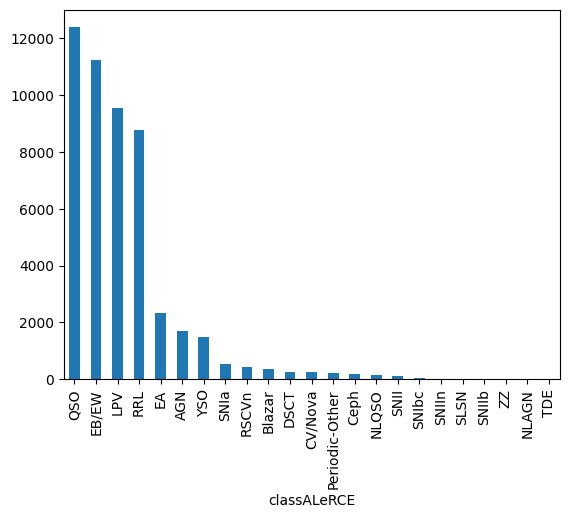

In [2]:
labels=pd.read_pickle("dfcrossmatches_small.pickle")    #leemos el archivo de etiquetas y guardamos como un dataframe
display(labels)                                       #visualizamos el dataframe
labels=labels["classALeRCE"]                            #nos quedamos solo con la columna 'classALeRCE'
labels.value_counts().plot.bar()                        #ploteamos el histograma de las clases


Podemos notar claramente que existe un desbalance entre las clases

In [3]:
features=pd.read_pickle("features_small.pickle")                #leemos y guardamos el archivo de las caracteristicas
display(features)                                             #visualizamos el dataframe
features=features.pivot(columns=['name','fid'],values='value')  #reorganizamos el dataframe
features                                             #visualizamos el nuevo dataframe

name     value  fid        version
oid                                                        
ZTF17aaaabrg        Amplitude  0.242504    1  feature_0.0.1
ZTF17aaaabrg        Amplitude  0.232499    2  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    1  feature_0.0.1
ZTF17aaaabrg  AndersonDarling  1.000000    2  feature_0.0.1
ZTF17aaaabrg   Autocor_length  1.000000    1  feature_0.0.1
...                       ...       ...  ...            ...
ZTF21abkylyc              Std  0.239856    2  feature_0.0.1
ZTF21abkylyc         StetsonK       NaN    1  feature_0.0.1
ZTF21abkylyc         StetsonK  0.886870    2  feature_0.0.1
ZTF21abkylyc            W1-W2       NaN    0  feature_0.0.1
ZTF21abkylyc            W2-W3       NaN    0  feature_0.0.1

[6739900 rows x 4 columns]

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250       NaN        0.677959       NaN            1.0   
ZTF21abkndcw  0.617332       NaN        0.989514       NaN            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu       NaN  0.402185             NaN  1.000000            NaN   
ZTF21abkylyc       NaN  0.369650             NaN  0.576287            NaN   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  NaN   0.333333       NaN  0.0       NaN  ...       NaN   
ZTF21abkndcw  NaN   0.166667       NaN  0.0       NaN  ...       NaN   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0        NaN  0.322581  NaN  0.000000  ...  0.268336   
ZTF21abkylyc  1.0        NaN  0.250000  NaN  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511       NaN       NaN        NaN       NaN   
ZTF17aaaabtj  0.967987  0.758365       NaN       NaN        NaN       NaN   
ZTF17aaaacml  0.946447  0.786144       NaN       NaN        NaN       NaN   
ZTF17aaaacnc  0.525565  0.786877       NaN       NaN        NaN       NaN   
ZTF17aaaacnt  0.820105  0.772239       NaN       NaN        NaN       NaN   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906       NaN       NaN       NaN   0.000866       NaN   
ZTF21abkndcw  0.777093       NaN  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu       NaN  0.850610       NaN       NaN   0.002877       NaN   
ZTF21abkylyc       NaN  0.886870       NaN       NaN   0.184779       NaN   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg       NaN       NaN       NaN  
ZTF17aaaabtj       NaN       NaN       NaN  
ZTF17aaaacml       NaN       NaN       NaN  
ZTF17aaaacnc       NaN       NaN       NaN  
ZTF17aaaacnt       NaN       NaN       NaN  
...                ...       ...       ...  
ZTF21abkjyui       NaN       NaN       NaN  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu       NaN       NaN       NaN  
ZTF21abkylyc       NaN       NaN       NaN  

[39024 rows x 179 columns]

In [4]:
#Ahora para poder acceder a una columna usamos una tupla de la forma (name,fid), ej:
features[('Std',2)][:5]       #primeros 5 valores de la columna Std,2

oid
ZTF17aaaabrg    0.164944
ZTF17aaaabtj    0.119271
ZTF17aaaacml    0.115176
ZTF17aaaacnc    0.102518
ZTF17aaaacnt    0.271919
Name: (Std, 2), dtype: float64

In [5]:
display(features.median())                       #mostramos la mediana de cada columna
features.fillna(features.median(),inplace=True)    #remplazamos los valores nan por la mediana respectiva
features                                 #mostramos el nuevo dataframe

name             fid
Amplitude        1      0.402083
                 2      0.341036
AndersonDarling  1      0.999934
                 2      0.999747
Autocor_length   1      1.000000
                          ...   
Power_rate       12     0.029785
r-W2             0      4.645677
r-W3             0      7.501856
W1-W2            0      0.559000
W2-W3            0      2.527000
Length: 179, dtype: float64

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250  0.341036        0.677959  0.999747            1.0   
ZTF21abkndcw  0.617332  0.341036        0.989514  0.999747            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu  0.402083  0.402185        0.999934  1.000000            1.0   
ZTF21abkylyc  0.402083  0.369650        0.999934  0.576287            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  1.0   0.333333  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abkndcw  1.0   0.166667  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0   0.329268  0.322581  0.0  0.000000  ...  0.268336   
ZTF21abkylyc  1.0   0.329268  0.250000  0.0  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaabtj  0.967987  0.758365  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacml  0.946447  0.786144  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnc  0.525565  0.786877  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnt  0.820105  0.772239  4.943869  7.820271   0.029785  4.645677   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906  0.825233  4.943869  7.820271   0.000866  4.645677   
ZTF21abkndcw  0.777093  0.825233  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu  0.834742  0.850610  4.943869  7.820271   0.002877  4.645677   
ZTF21abkylyc  0.834742  0.886870  4.943869  7.820271   0.184779  4.645677   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg  7.501856  0.559000  2.527000  
ZTF17aaaabtj  7.501856  0.559000  2.527000  
ZTF17aaaacml  7.501856  0.559000  2.527000  
ZTF17aaaacnc  7.501856  0.559000  2.527000  
ZTF17aaaacnt  7.501856  0.559000  2.527000  
...                ...       ...       ...  
ZTF21abkjyui  7.501856  0.559000  2.527000  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu  7.501856  0.559000  2.527000  
ZTF21abkylyc  7.501856  0.559000  2.527000  

[39024 rows x 179 columns]

In [6]:
df=pd.concat([labels,features],axis=1)  #concatenamos la columna de la clase de ALeRCE con las de las caracteristicas
display(df)                           #mostramos el dataframe concatenado
df.dropna(inplace=True)                 #borramos todas las filas con valores nan
df                             #mostramos el datframe filtrado

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF19abiblfd         RRL             NaN             NaN   
ZTF18acbvvku         AGN        0.849506        0.653158   
...                  ...             ...             ...   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF18ablqnie         LPV             NaN             NaN   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz       EB/EW        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF19abiblfd                   NaN                   NaN                  NaN   
ZTF18acbvvku              1.000000              1.000000                 12.0   
...                            ...                   ...                  ...   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF18ablqnie                   NaN                   NaN                  NaN   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF19abiblfd                  NaN              NaN              NaN       NaN   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
...                           ...              ...              ...       ...   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF18ablqnie                  NaN              NaN              NaN       NaN   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF19abiblfd  ...       NaN            NaN            NaN        NaN   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
...           ...       ...            ...            ...        ...   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF18ablqnie  ...       NaN            NaN            NaN        NaN   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF18acbvvku         AGN        0.849506        0.653158   
ZTF18acefhus         QSO        0.178364        0.192065   
...                  ...             ...             ...   
ZTF19aarauin         RRL        0.587070        0.565650   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz       EB/EW        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF18acbvvku              1.000000              1.000000                 12.0   
ZTF18acefhus              0.999954              0.999975                  5.0   
...                            ...                   ...                  ...   
ZTF19aarauin              0.999999              1.000000                  2.0   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
ZTF18acefhus                  6.0         0.294872         0.244898  0.000000   
...                           ...              ...              ...       ...   
ZTF19aarauin                  2.0         0.413793         0.351351  0.000000   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
ZTF18acefhus  ...  0.085607       0.739245       0.714789   4.943869   
...           ...       ...            ...            ...        ...   
ZTF19aarauin  ...  0.319543       0.888937       0.912618   4.943869   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

<Axes: xlabel='classALeRCE'>

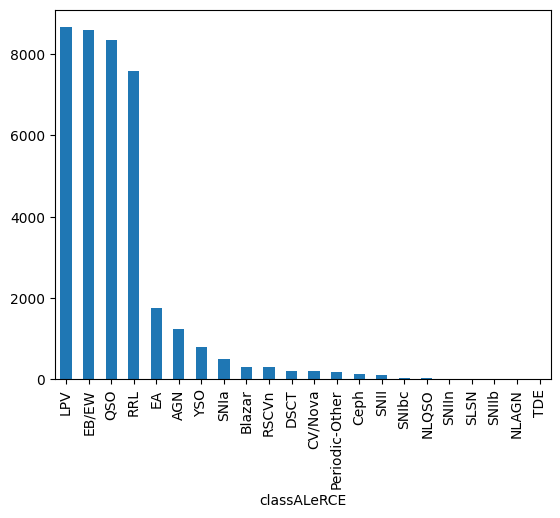

In [7]:
df['classALeRCE'].value_counts().plot.bar()

classALeRCE  (Amplitude, 1)  (Amplitude, 2)  \
oid                                                        
ZTF18aaveffj         LPV        0.264278        0.363577   
ZTF19aauyvnv         LPV        0.402083        0.341036   
ZTF18ablqvvc         RRL        0.402083        0.100148   
ZTF18acbvvku         AGN        0.849506        0.653158   
ZTF18acefhus         QSO        0.178364        0.192065   
...                  ...             ...             ...   
ZTF19aarauin         RRL        0.587070        0.565650   
ZTF18aawgtde         QSO        0.072512        0.064309   
ZTF19adcftsl         QSO        0.183510        0.341036   
ZTF17aaaeblo         LPV        2.309970        1.347452   
ZTF17aaawcpz          EB        0.621127        0.479609   

              (AndersonDarling, 1)  (AndersonDarling, 2)  (Autocor_length, 1)  \
oid                                                                             
ZTF18aaveffj              0.999210              1.000000                  6.0   
ZTF19aauyvnv              0.999934              0.999747                  1.0   
ZTF18ablqvvc              0.999934              0.621504                  1.0   
ZTF18acbvvku              1.000000              1.000000                 12.0   
ZTF18acefhus              0.999954              0.999975                  5.0   
...                            ...                   ...                  ...   
ZTF19aarauin              0.999999              1.000000                  2.0   
ZTF18aawgtde              0.684191              0.779616                 11.0   
ZTF19adcftsl              0.805664              0.999747                  2.0   
ZTF17aaaeblo              1.000000              1.000000                 15.0   
ZTF17aaawcpz              0.979799              0.998810                  2.0   

              (Autocor_length, 2)  (Beyond1Std, 1)  (Beyond1Std, 2)  (Con, 1)  \
oid                                                                             
ZTF18aaveffj                  6.0         0.248276         0.442424  0.006993   
ZTF19aauyvnv                  1.0         0.329268         0.325000  0.000000   
ZTF18ablqvvc                  1.0         0.329268         0.266667  0.000000   
ZTF18acbvvku                  9.0         0.404494         0.293103  0.000000   
ZTF18acefhus                  6.0         0.294872         0.244898  0.000000   
...                           ...              ...              ...       ...   
ZTF19aarauin                  2.0         0.413793         0.351351  0.000000   
ZTF18aawgtde                  1.0         0.315217         0.250000  0.000000   
ZTF19adcftsl                  1.0         0.368421         0.325000  0.000000   
ZTF17aaaeblo                  5.0         0.420814         0.457944  0.000000   
ZTF17aaawcpz                  1.0         0.172414         0.239130  0.000000   

              ...  (Std, 2)  (StetsonK, 1)  (StetsonK, 2)  (g-W2, 0)  \
oid           ...                                                      
ZTF18aaveffj  ...  0.195895       0.808636       0.822968   4.943869   
ZTF19aauyvnv  ...  0.212839       0.834742       0.825233   4.943869   
ZTF18ablqvvc  ...  0.053437       0.834742       0.821775   4.943869   
ZTF18acbvvku  ...  0.405141       0.909260       0.886437   4.943869   
ZTF18acefhus  ...  0.085607       0.739245       0.714789   4.943869   
...           ...       ...            ...            ...        ...   
ZTF19aarauin  ...  0.319543       0.888937       0.912618   4.943869   
ZTF18aawgtde  ...  0.035427       0.819063       0.758283   4.943869   
ZTF19adcftsl  ...  0.212839       0.861115       0.825233   5.867576   
ZTF17aaaeblo  ...  0.745226       0.872072       0.904087   4.943869   
ZTF17aaawcpz  ...  0.224842       0.735645       0.822329   4.943869   

              (g-W3, 0)  (Power_rate, 12)  (r-W2, 0)  (r-W3, 0)  (W1-W2, 0)  \
oid                                                                           
ZTF18aaveffj   7.820271      

<Axes: xlabel='classALeRCE'>

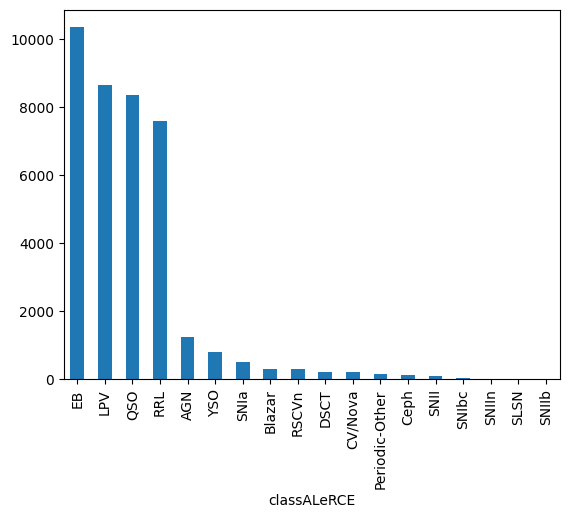

In [8]:
df.replace({'classALeRCE':{'EB/EW':'EB','EA':'EB'}},inplace=True)    #agrupamos las clases EB/EW y EA en EB
df=df.loc[~df['classALeRCE'].isin([ 'NLAGN', 'NLQSO', 'TDE', 'ZZ'])] #nos quedamo con los objetos que NO sean 'NLAGN', 'NLQSO', 'TDE', 'ZZ'
display(df)                                                          #visualizamos
df['classALeRCE'].value_counts().plot.bar()

In [9]:
#separamos y escalamos las features para obtener la matriz de diseño
scaler=StandardScaler()
features=df.drop(['classALeRCE'],axis=1)
scl_feat=scaler.fit_transform(features)

X=pd.DataFrame(scl_feat,index=features.index,columns=features.columns)
y=df.classALeRCE



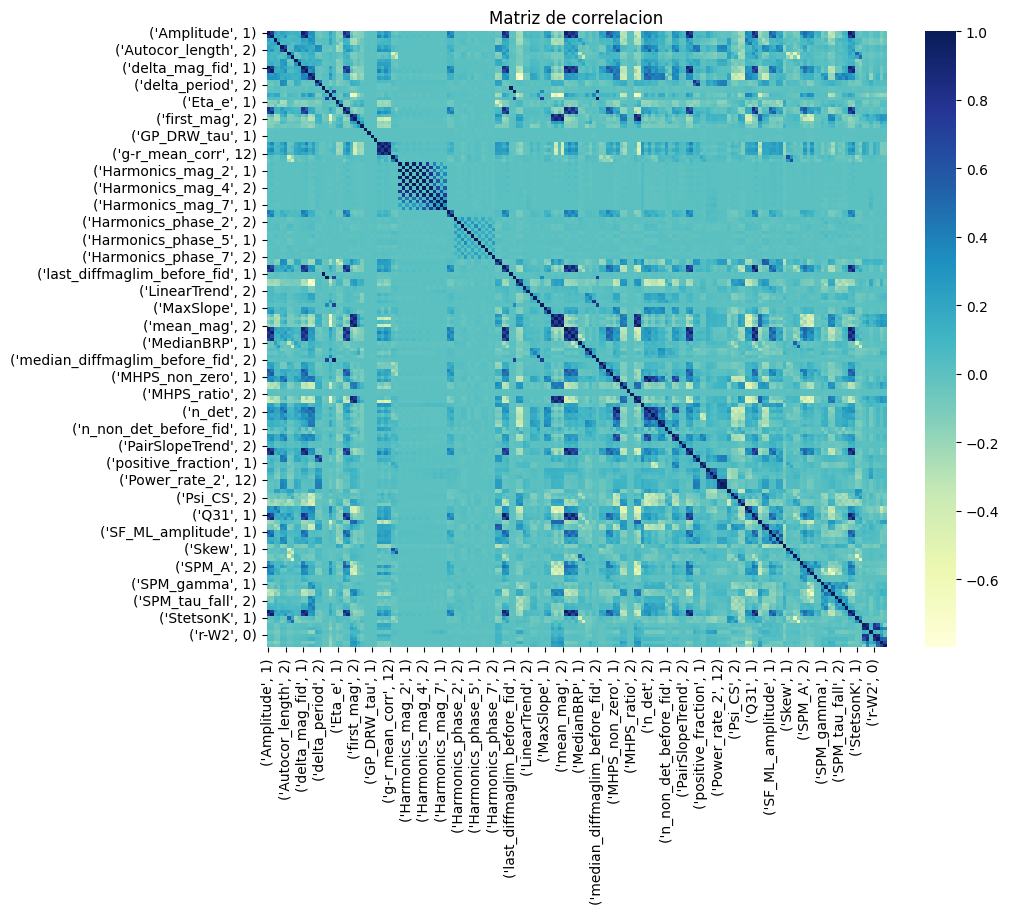

In [10]:
corr_mat=X.corr()                   #calculamos la matriz de correlacion
plt.figure(figsize=(10,8))          #visualizamos la matriz
sb.heatmap(corr_mat,cmap='YlGnBu')
plt.title('Matriz de correlacion')
plt.show()

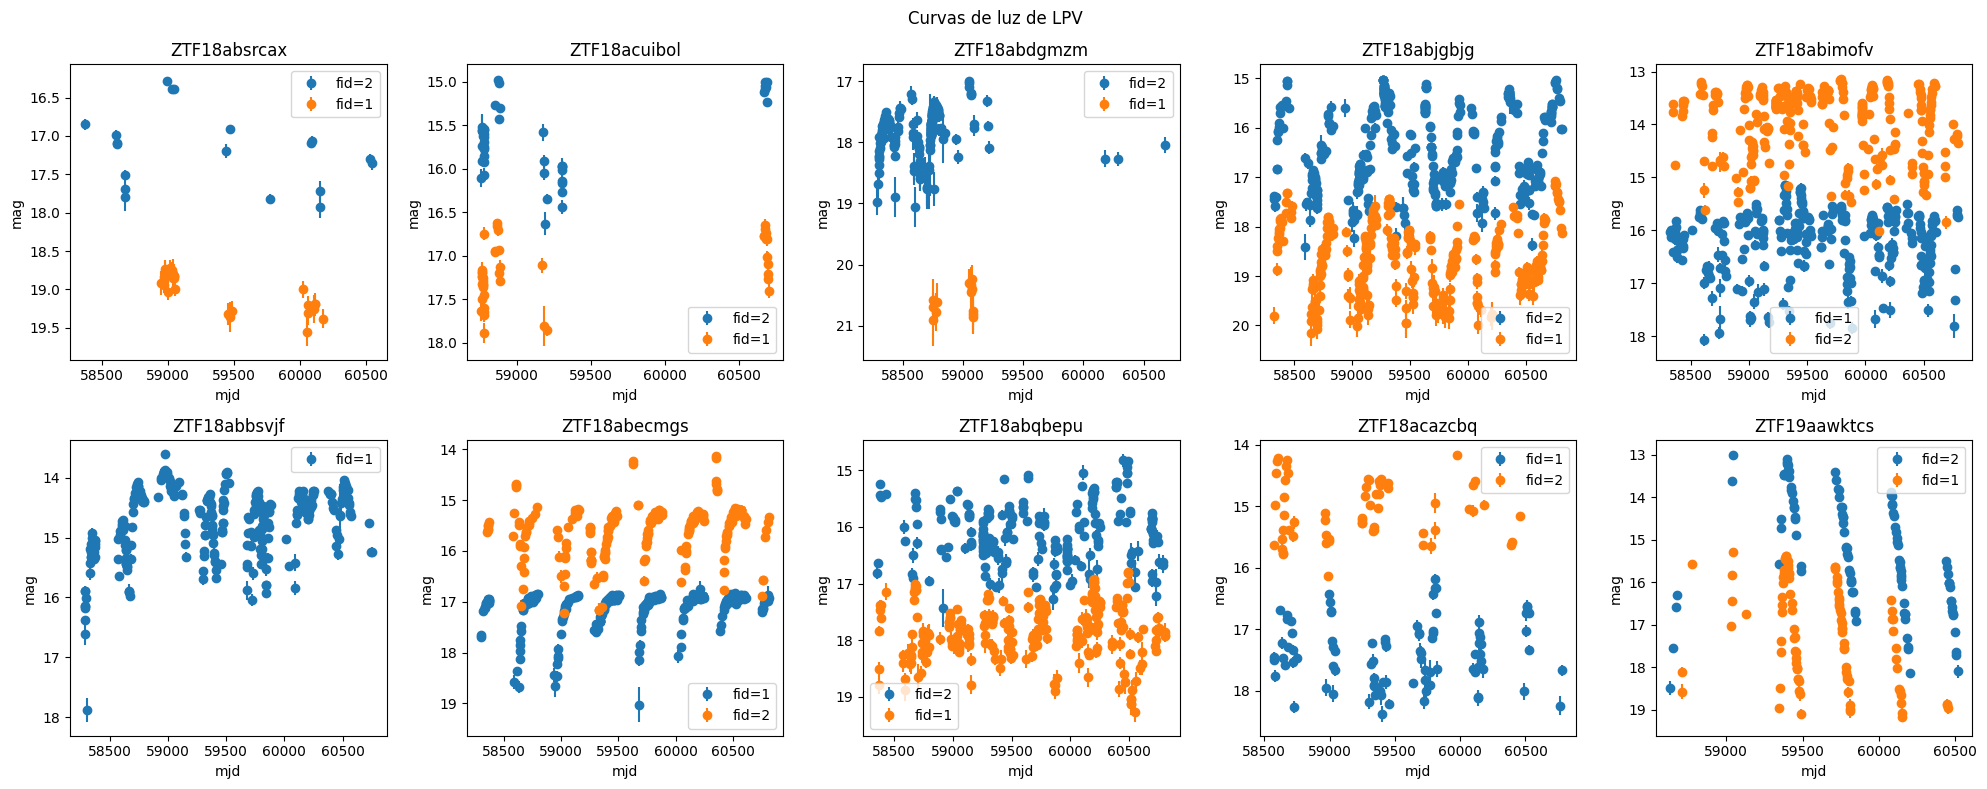

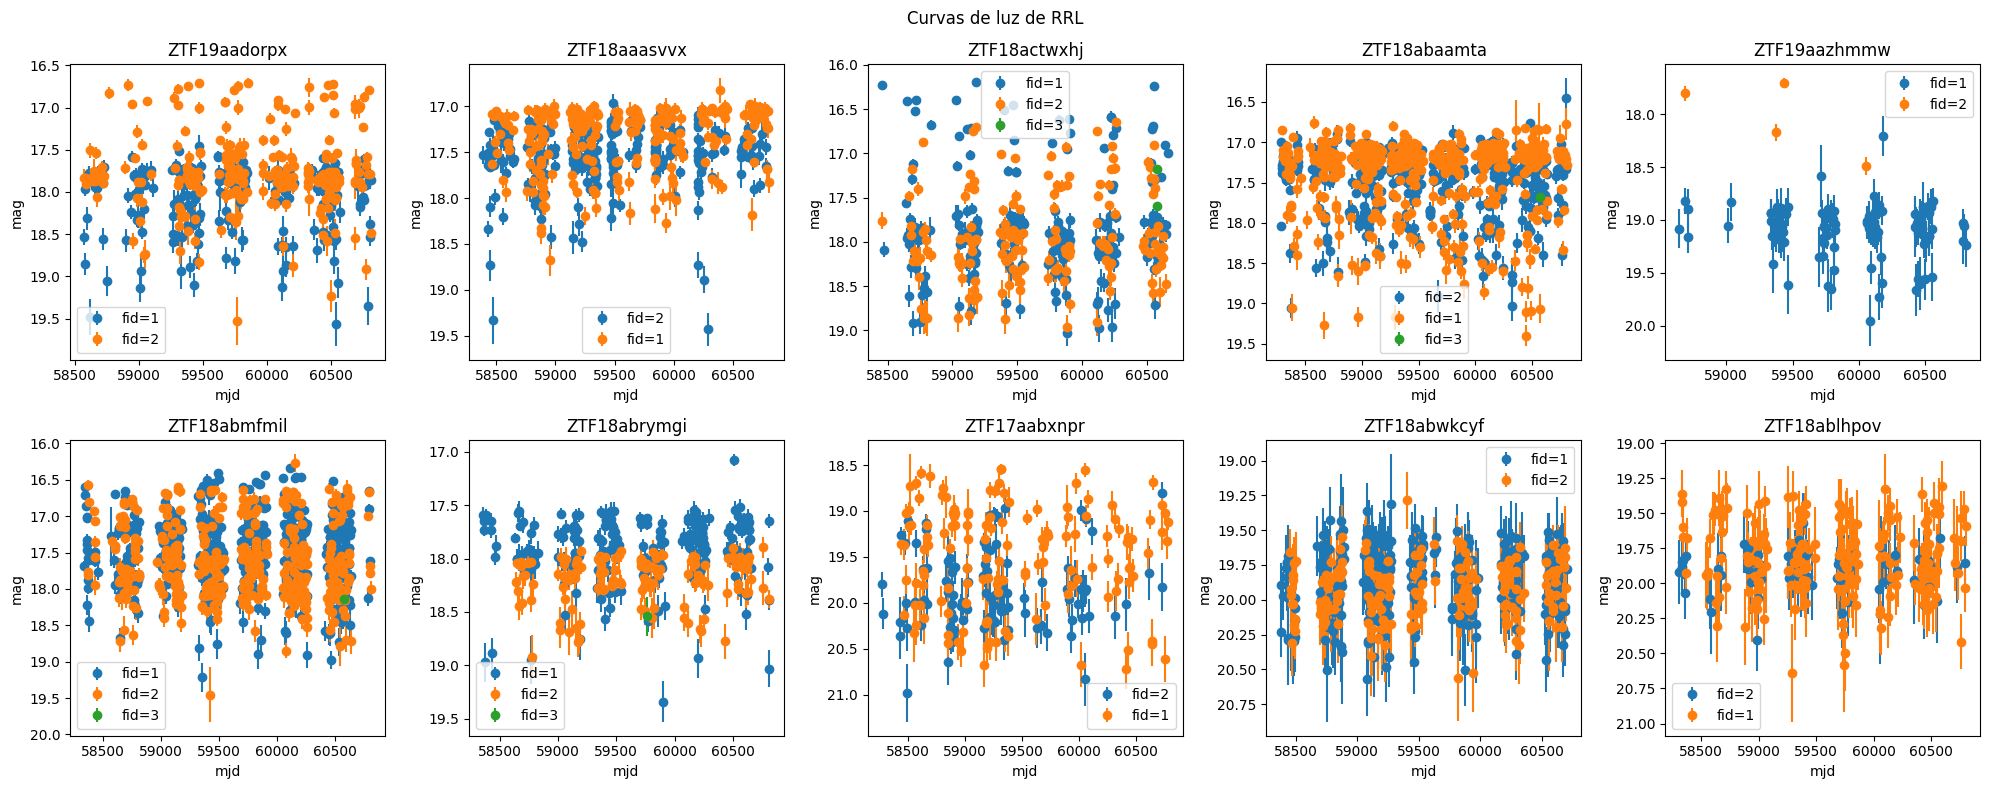

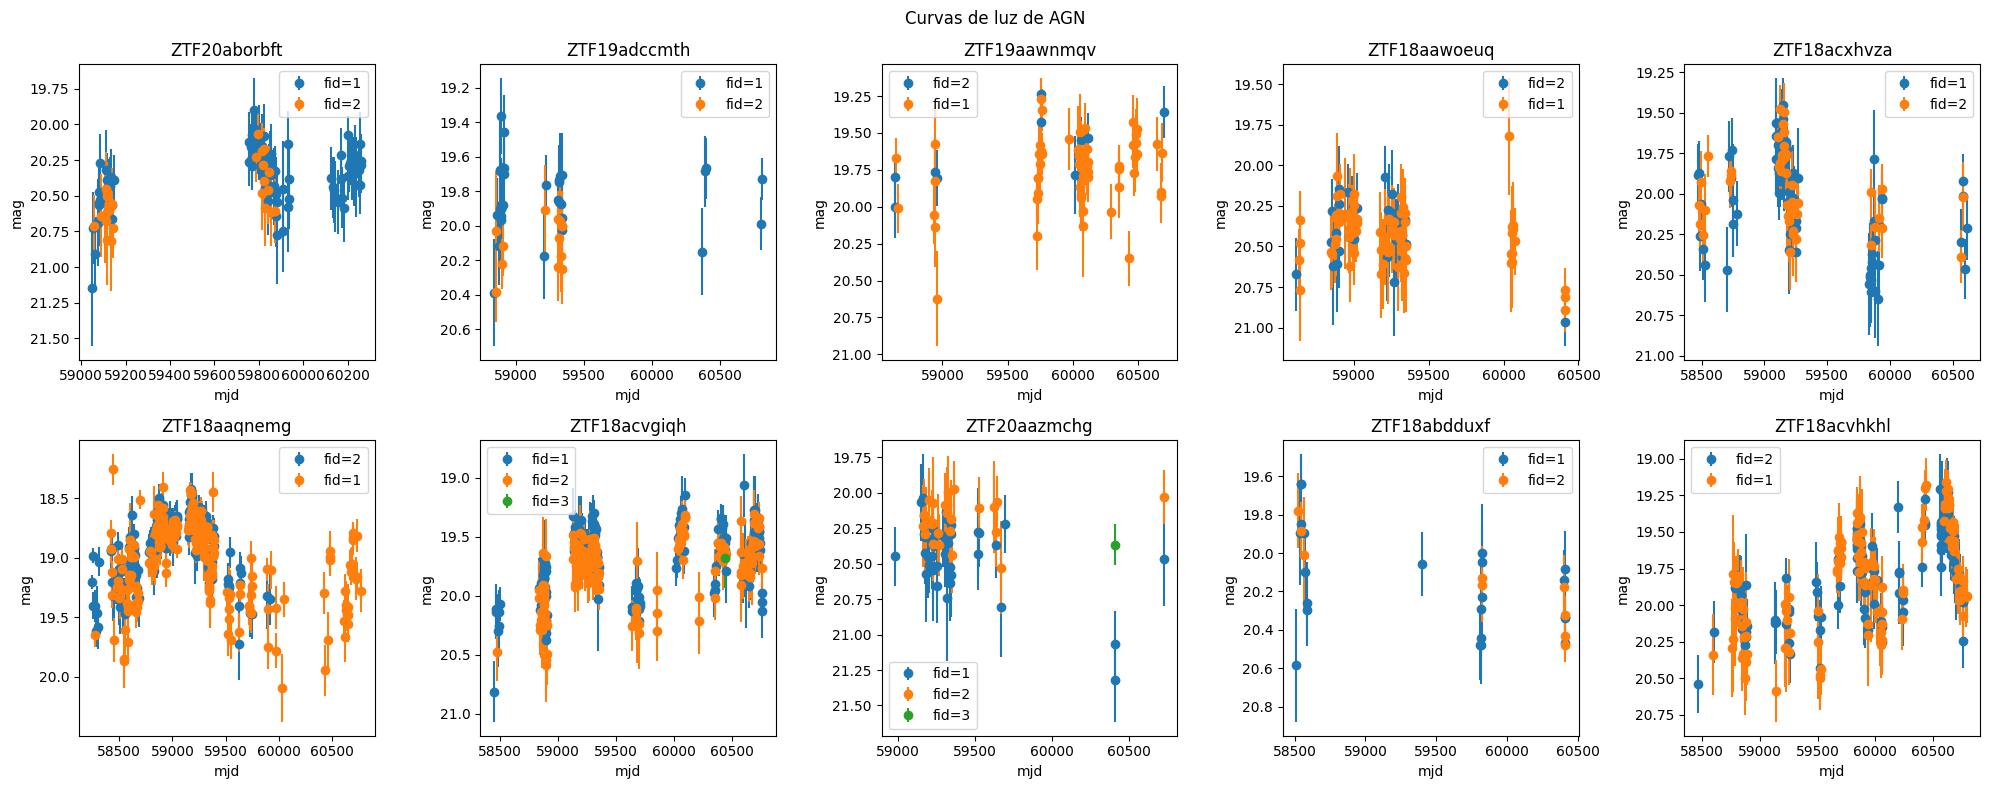

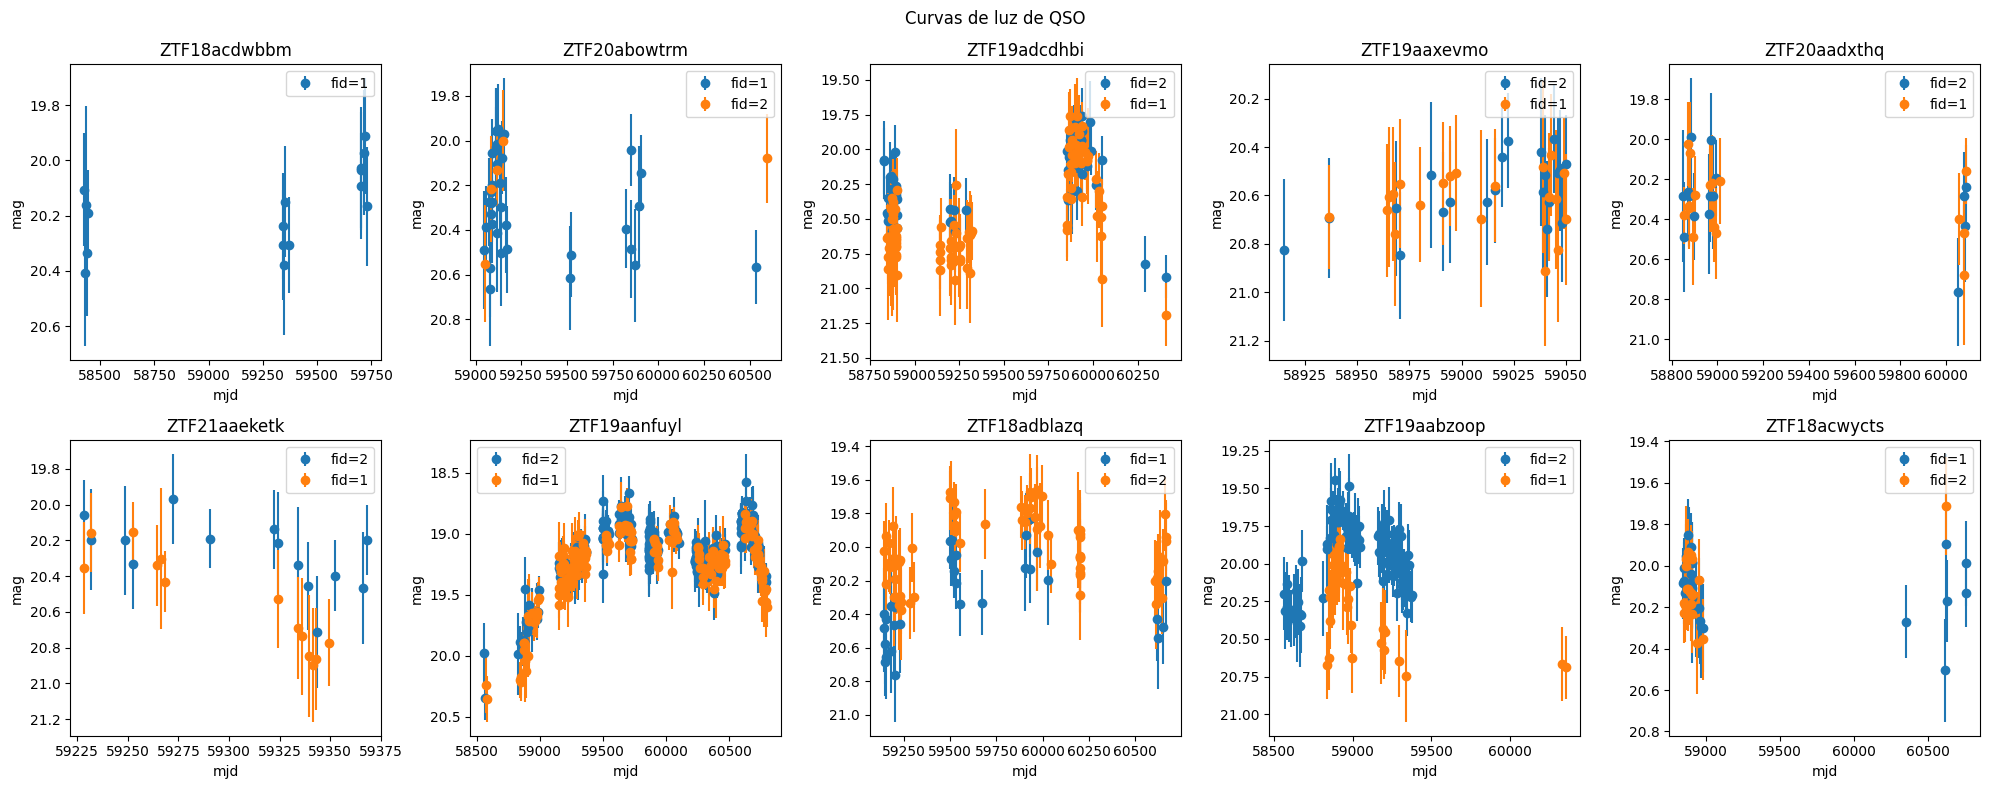

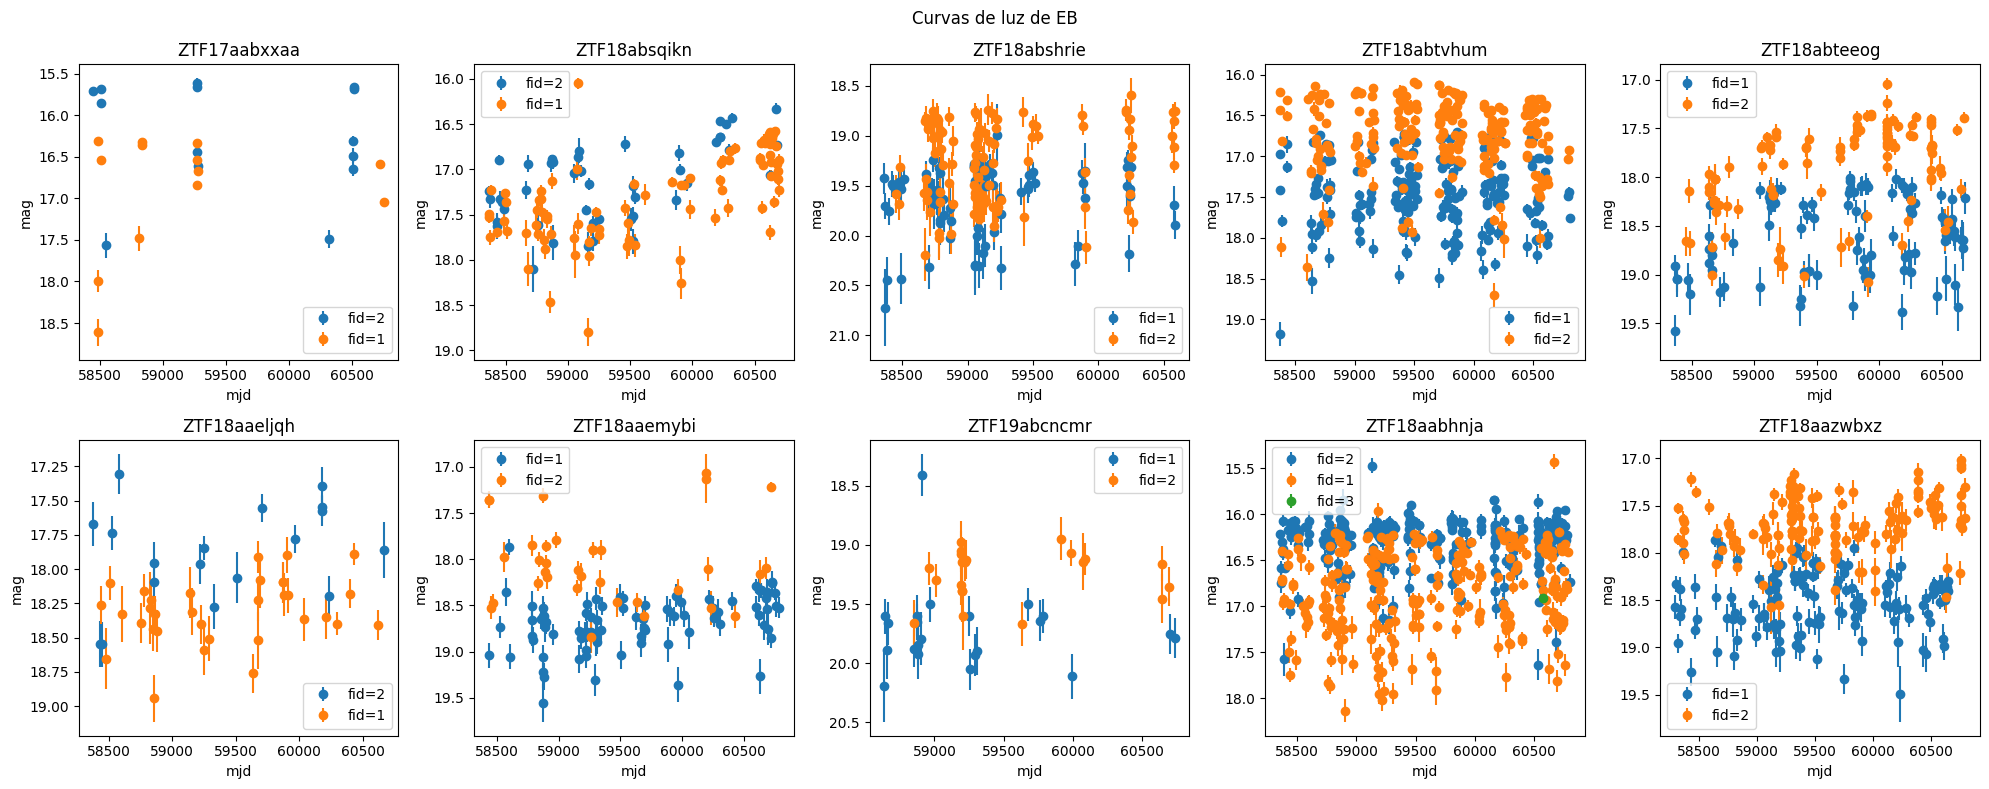

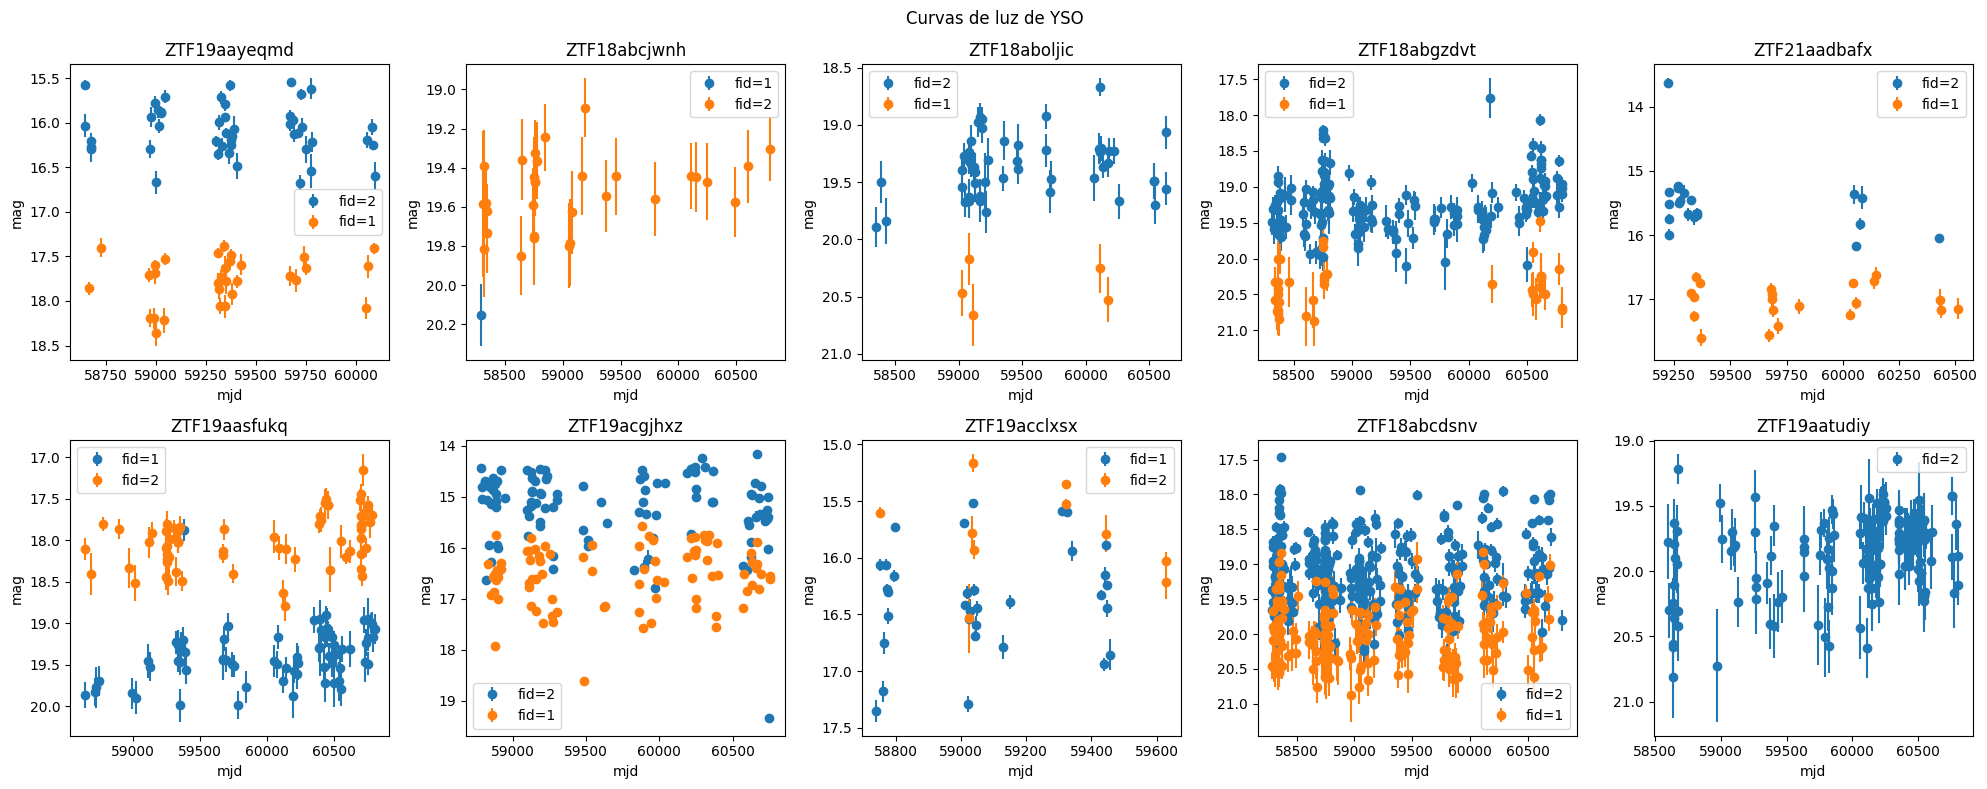

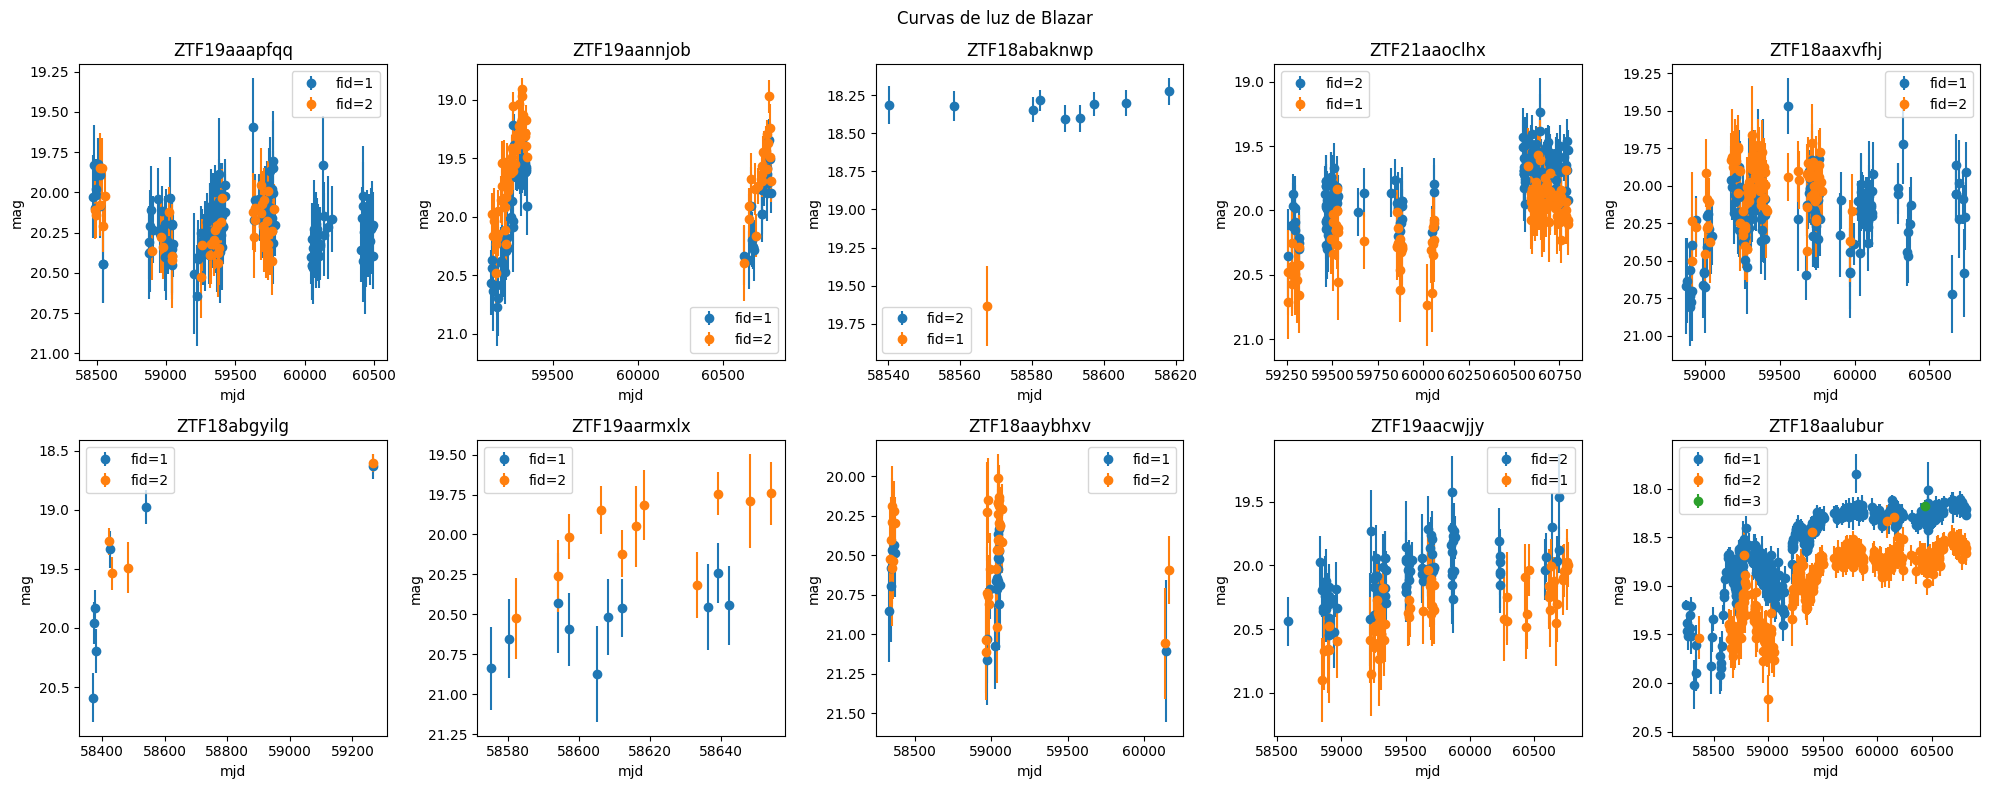

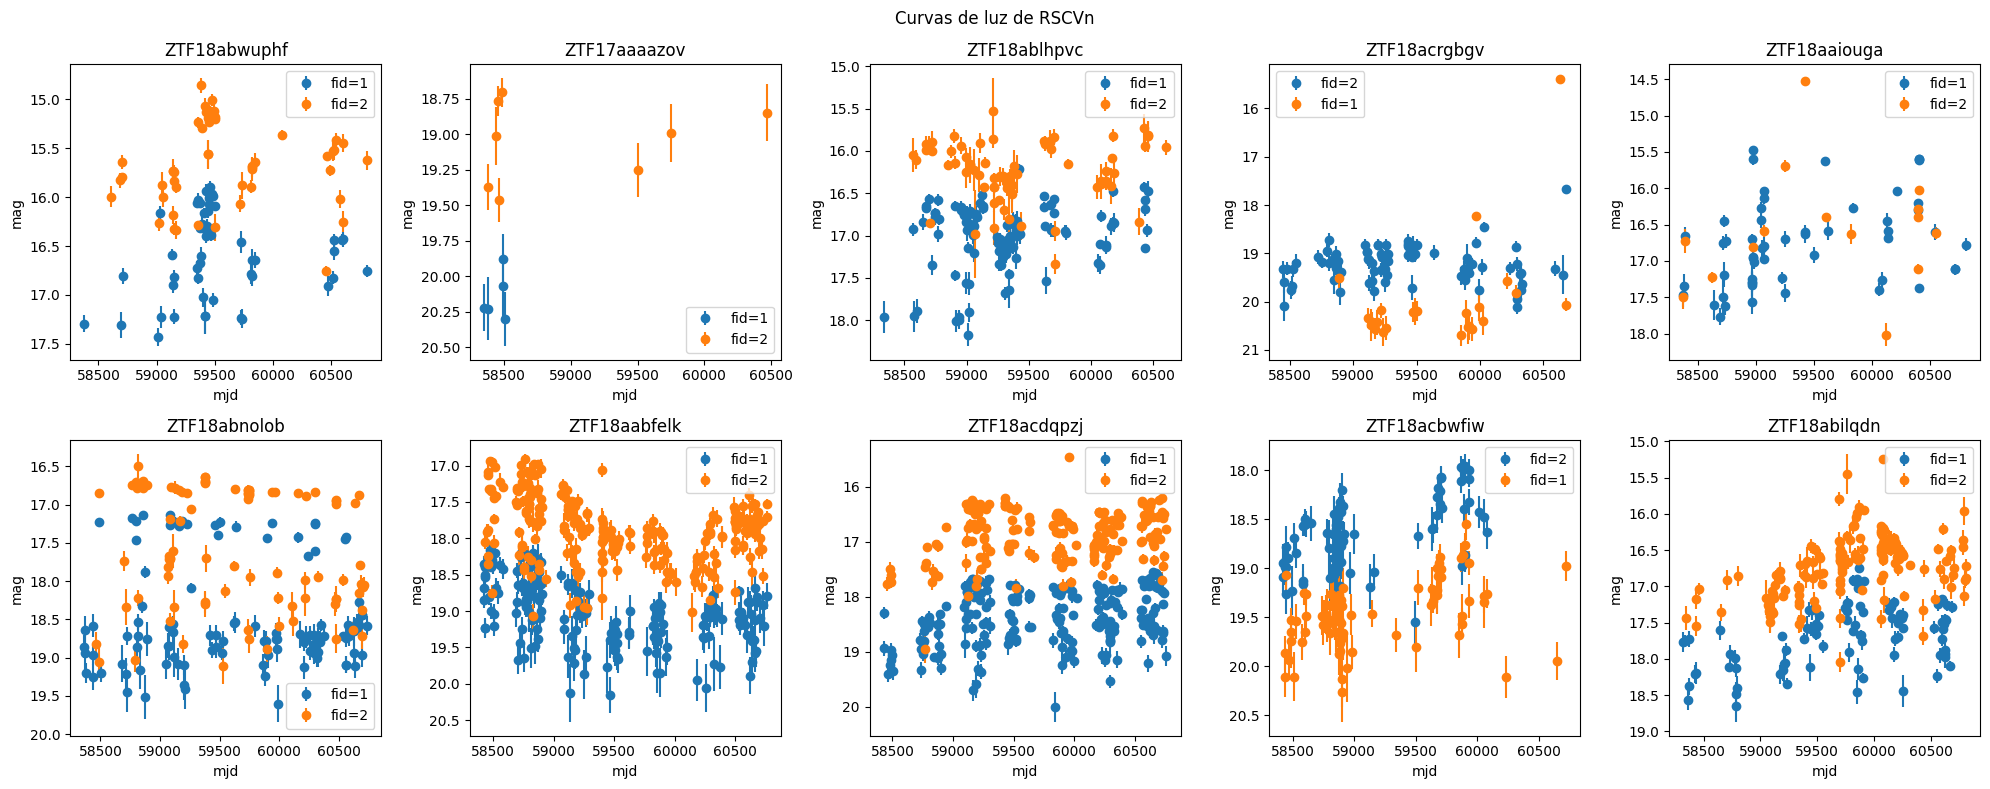

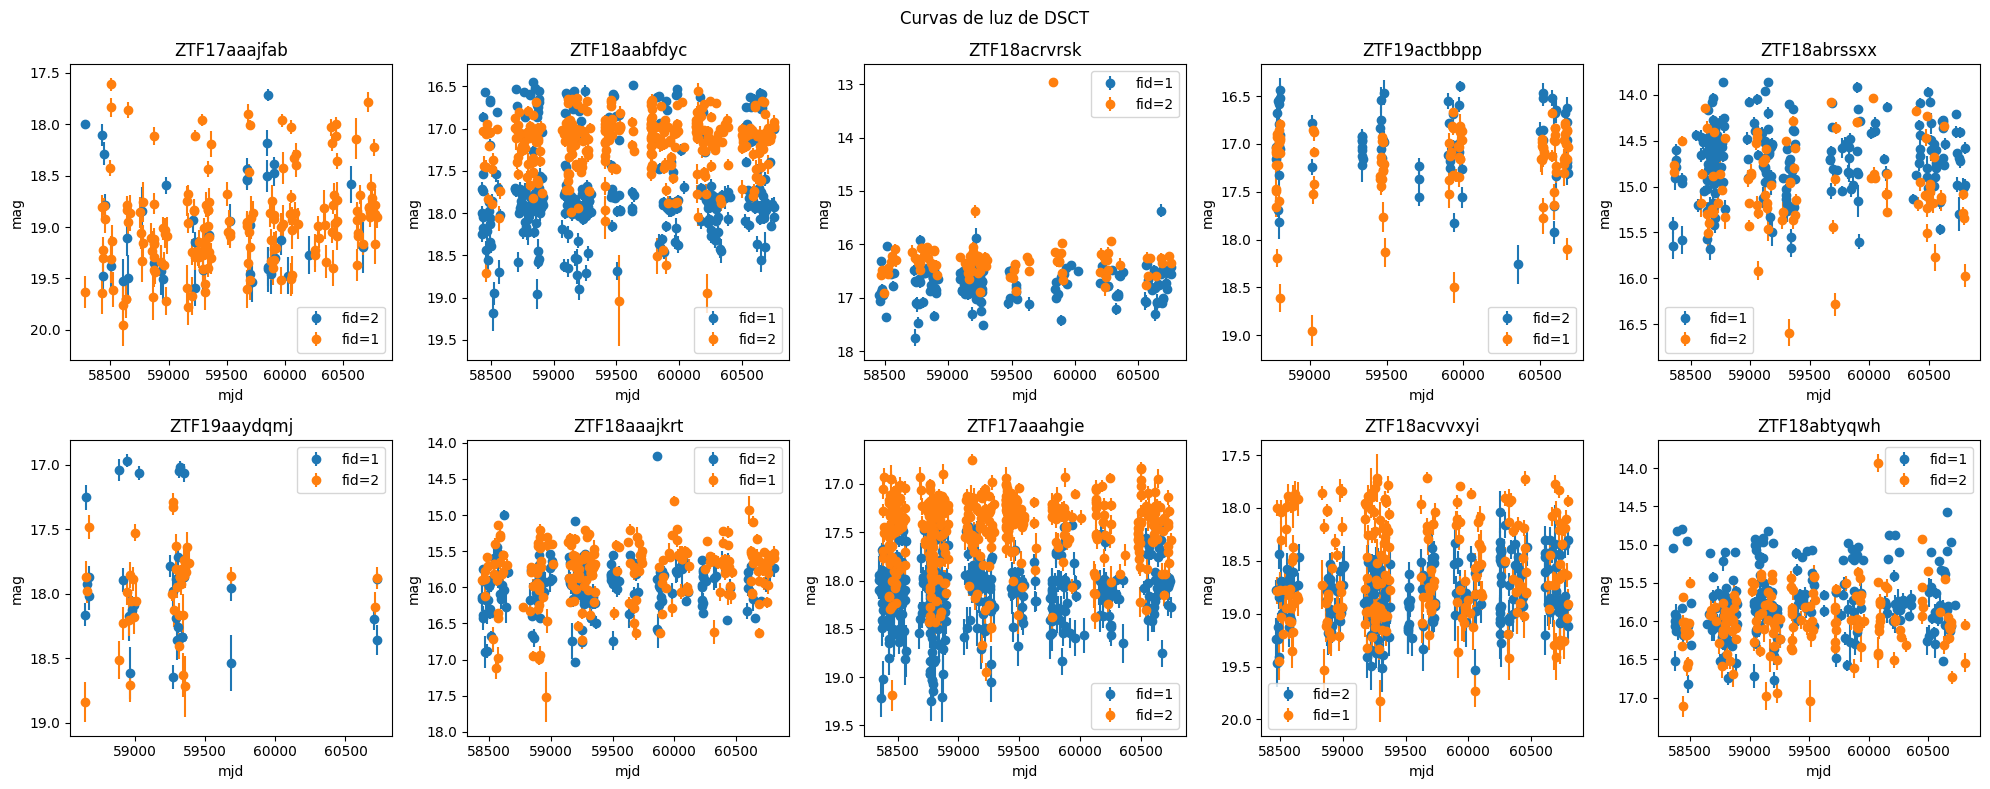

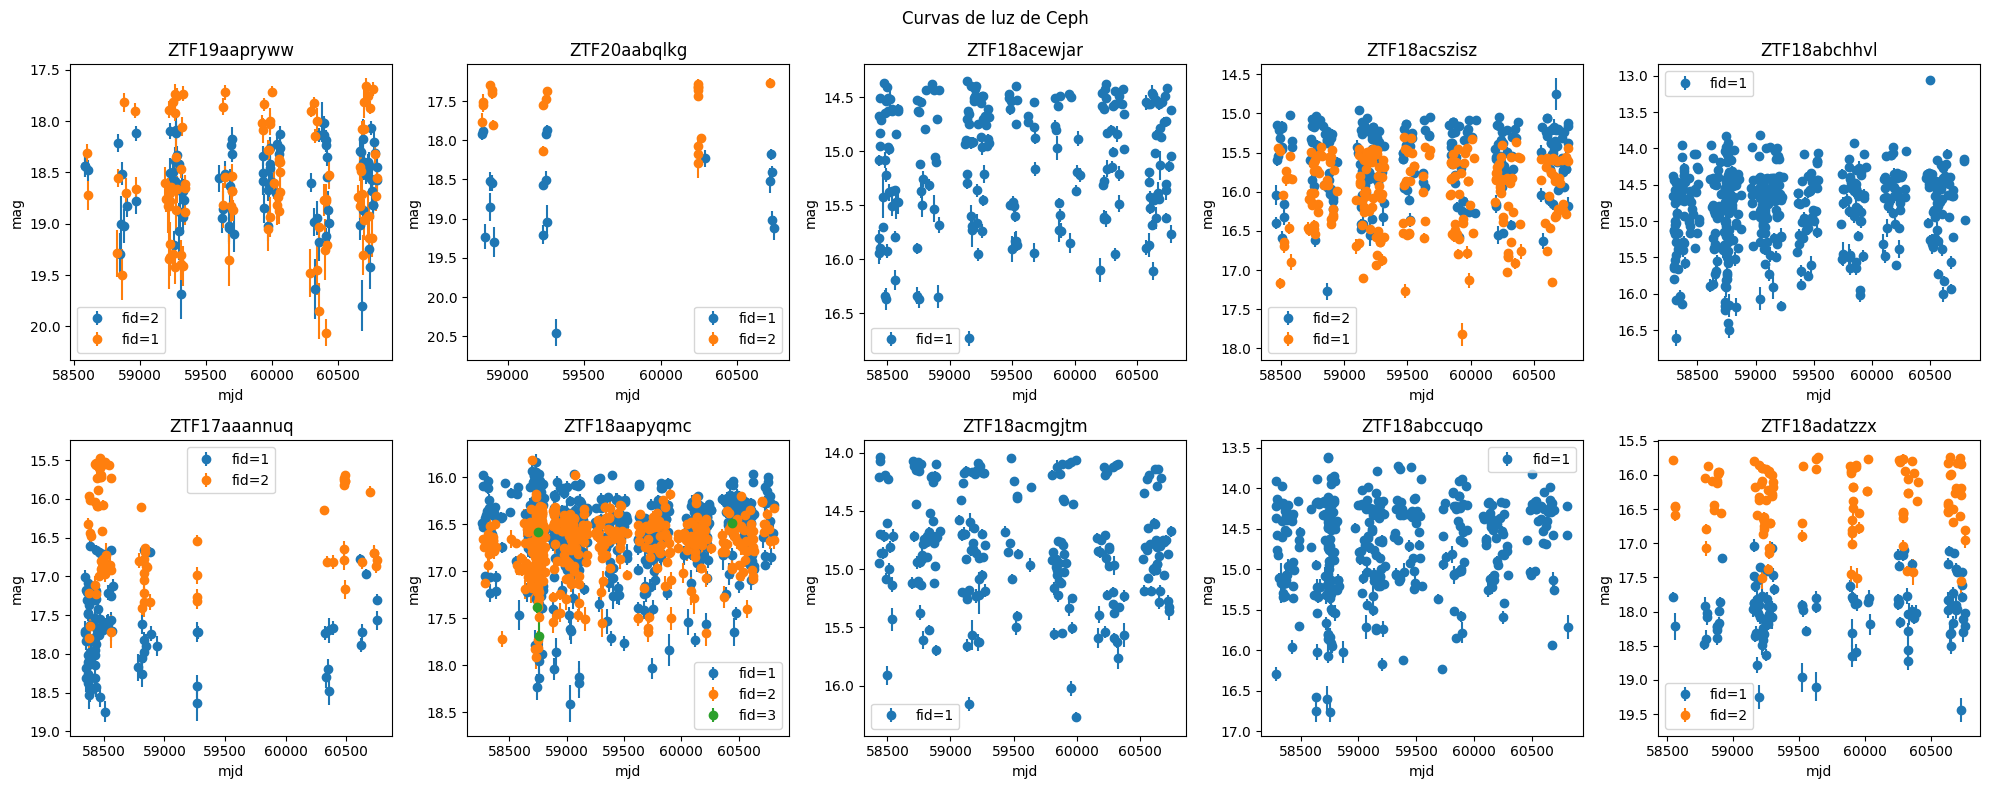

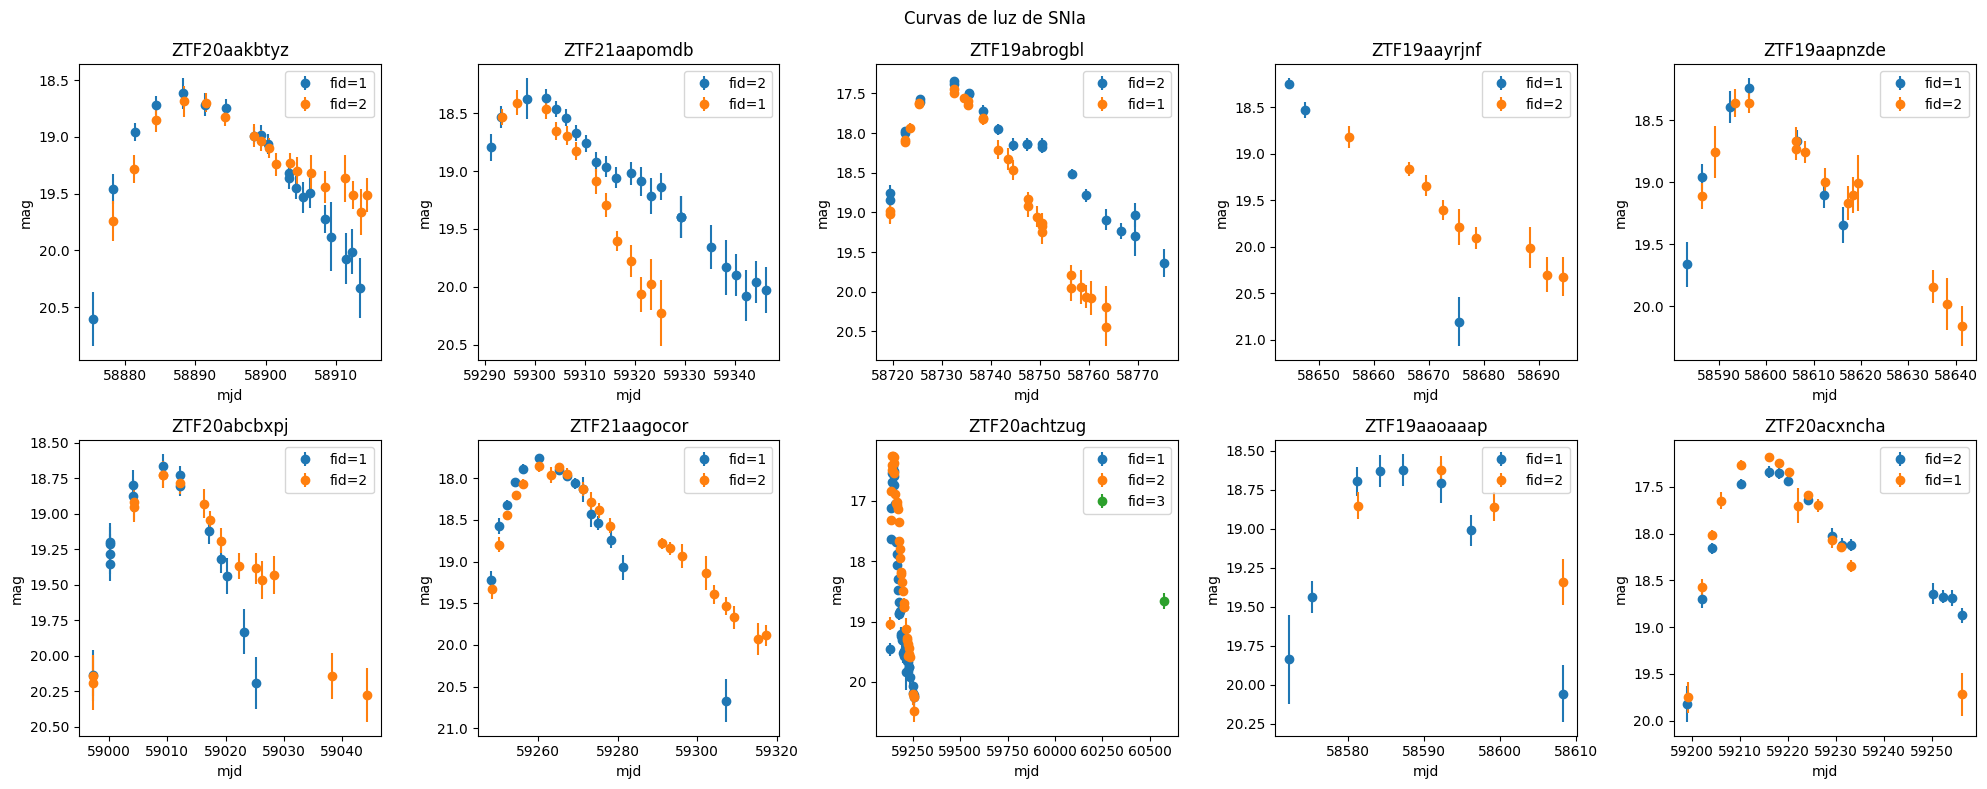

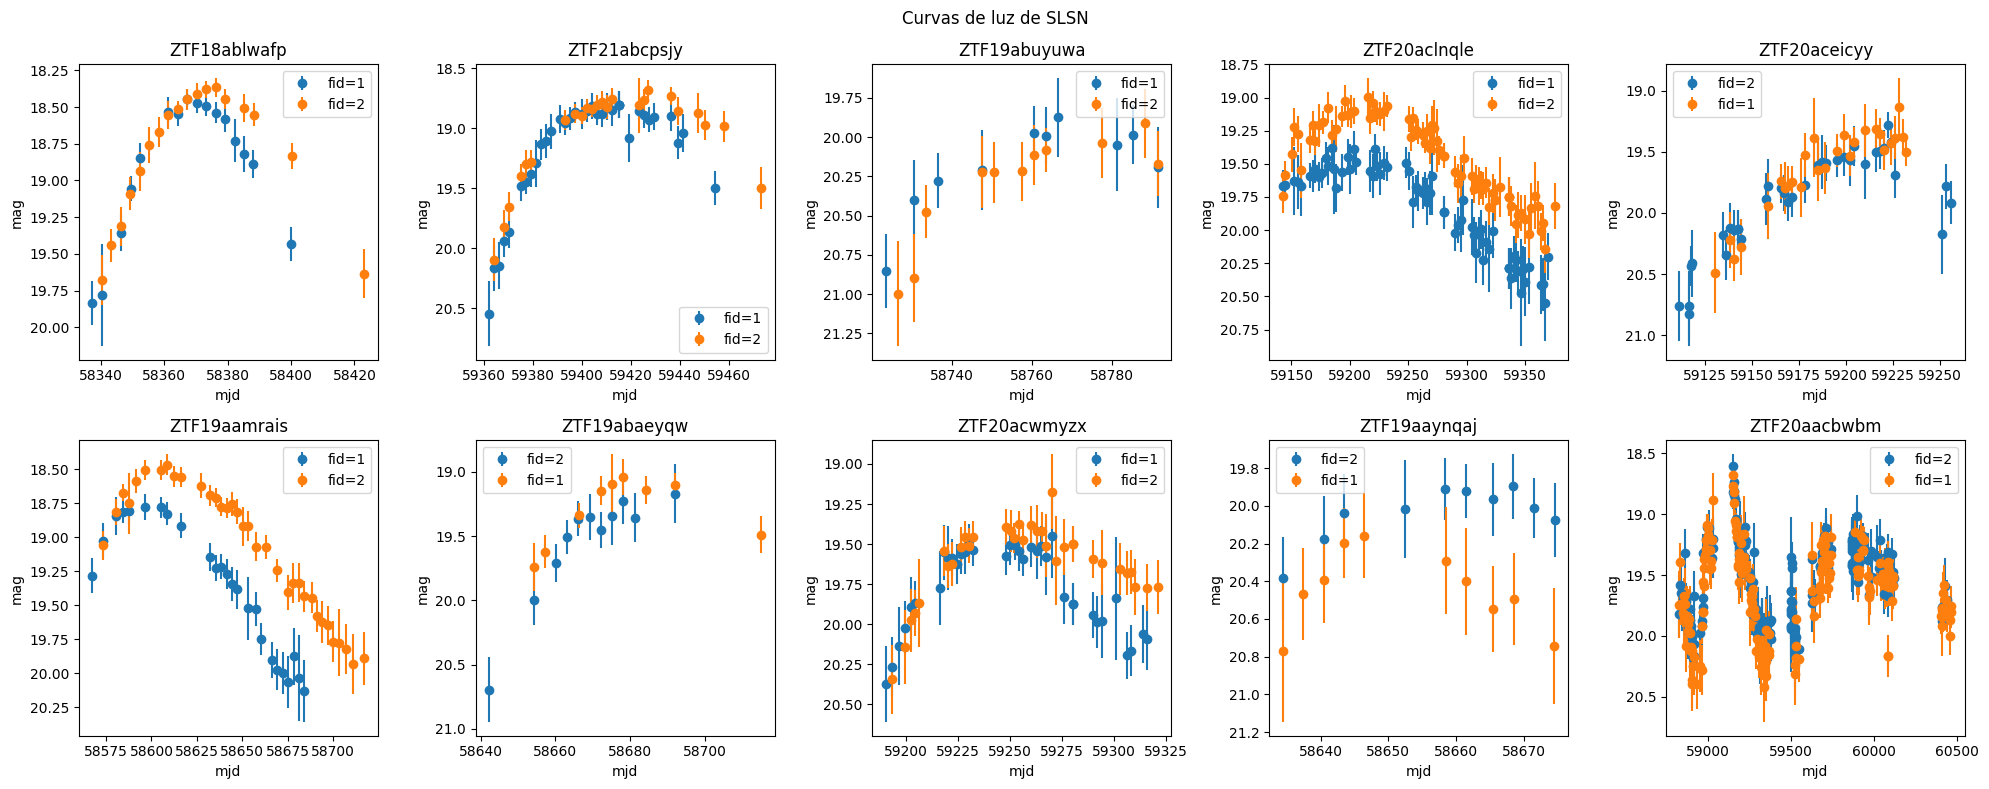

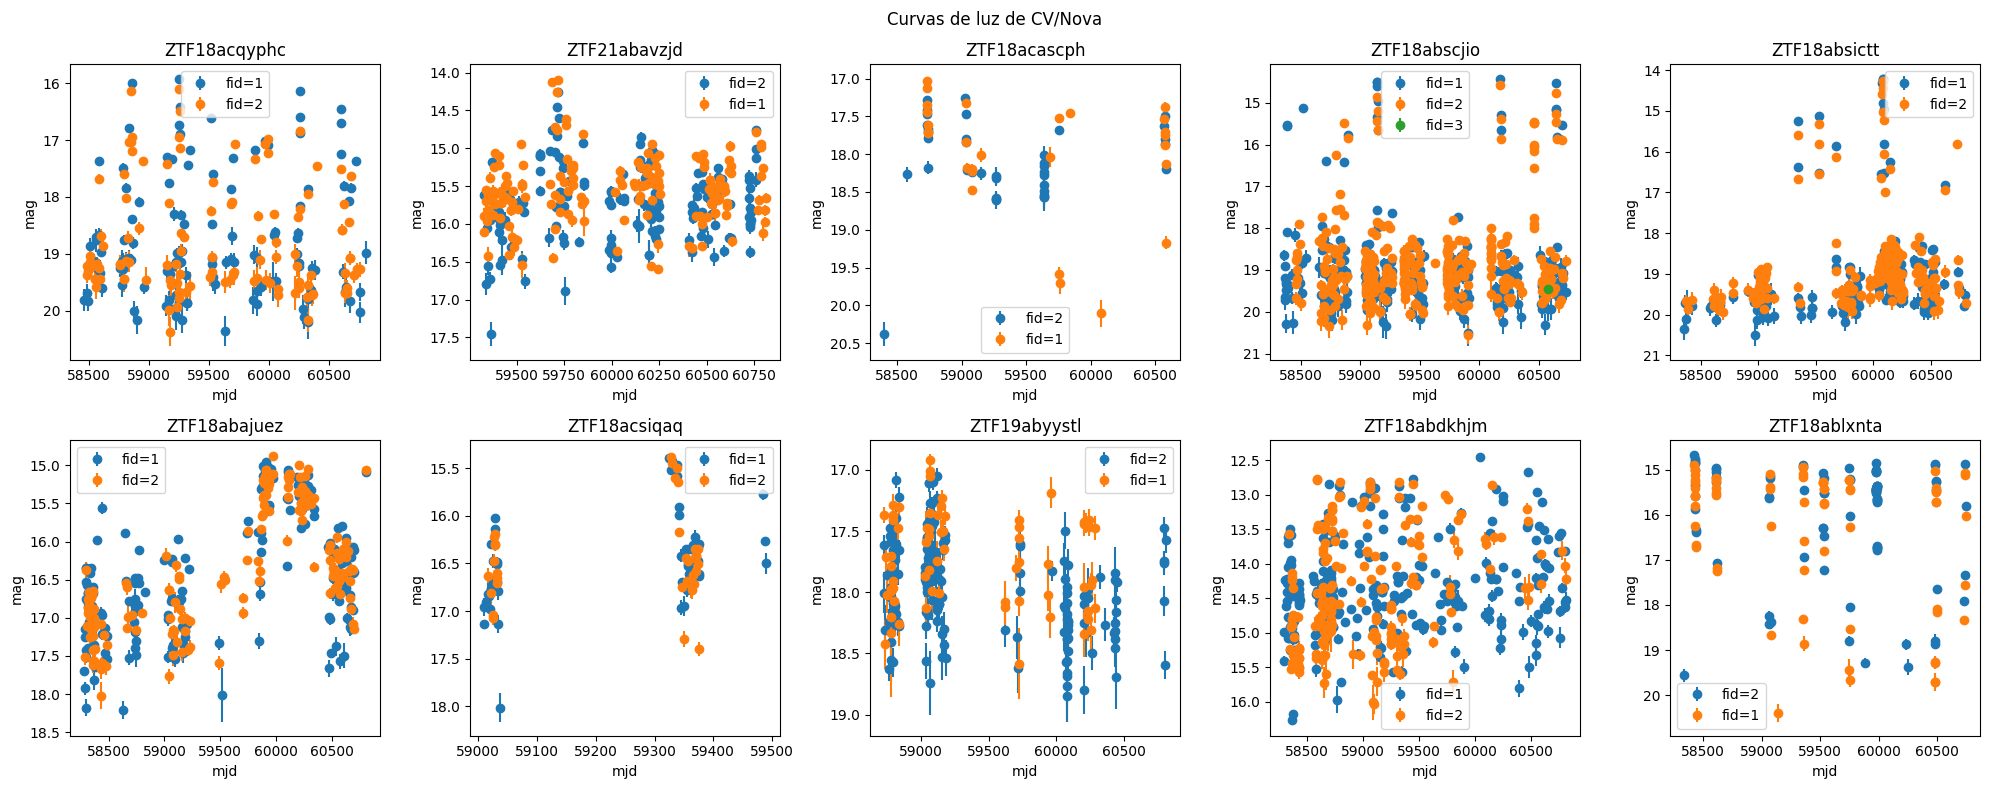

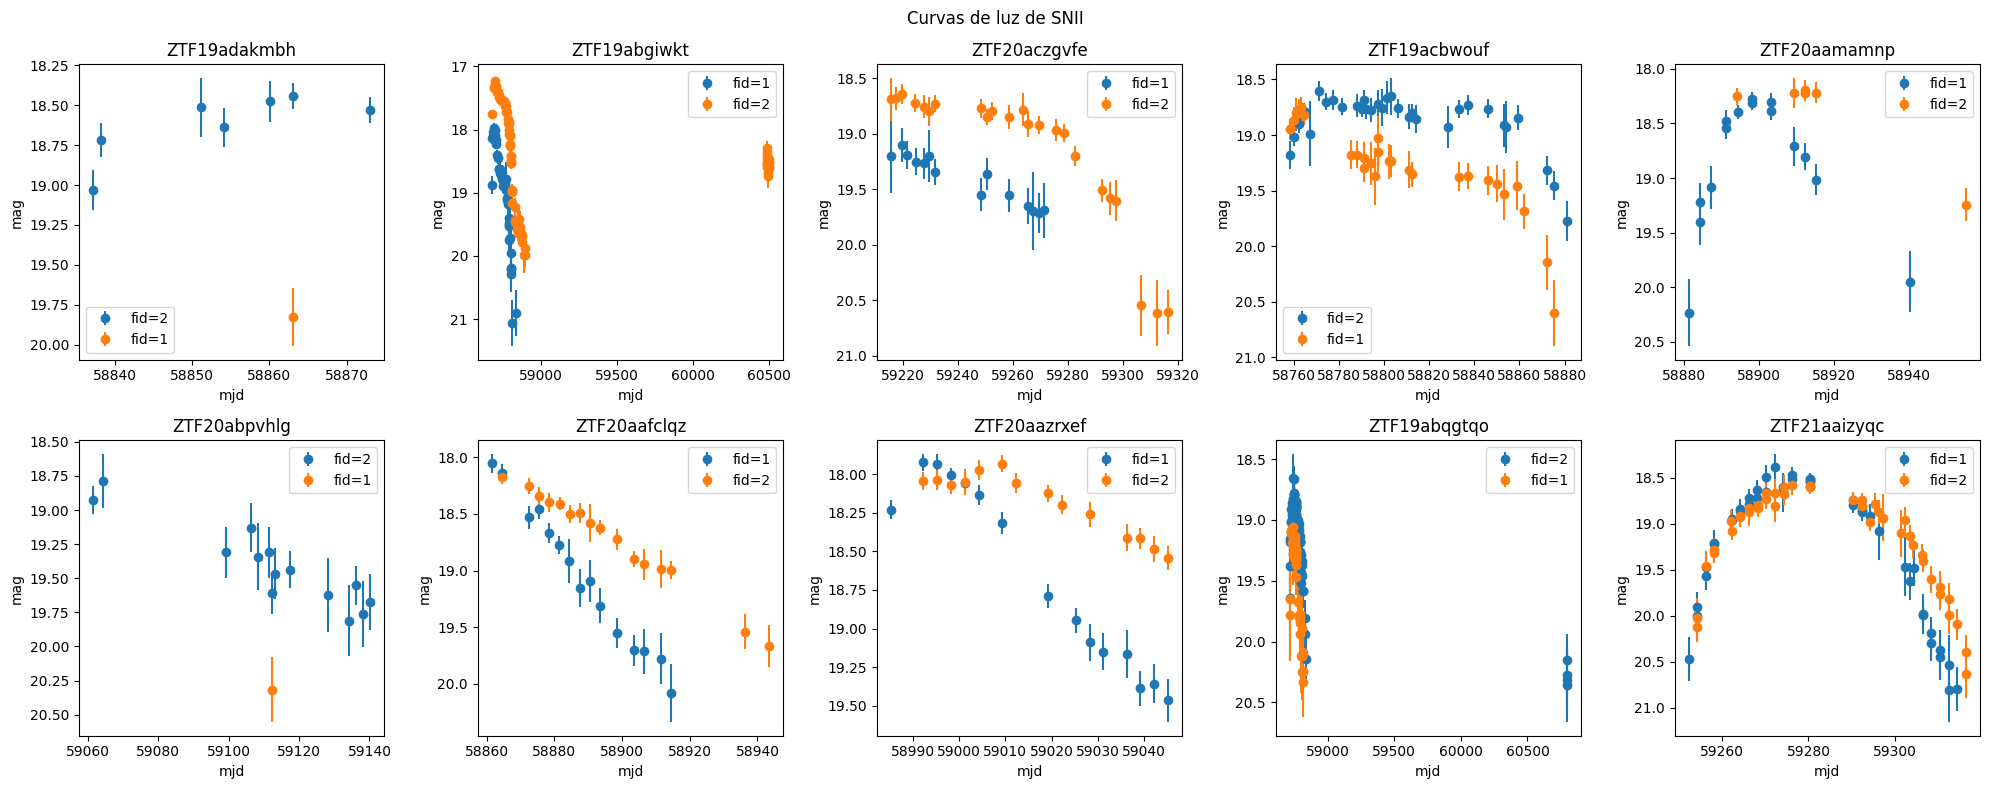

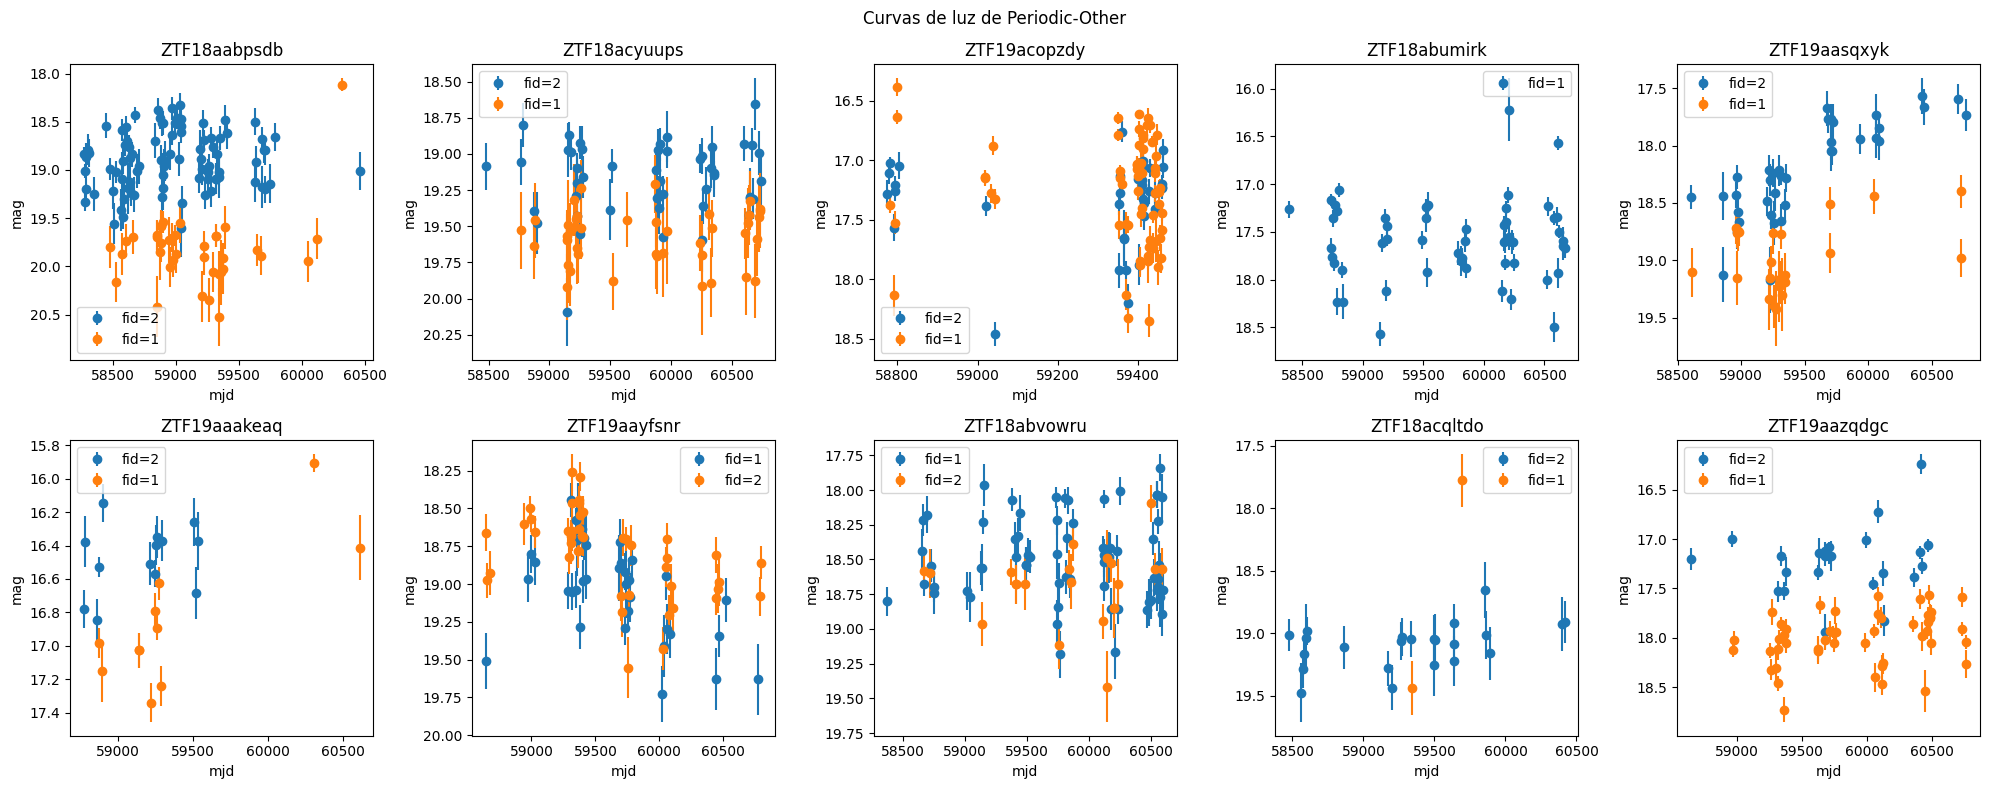

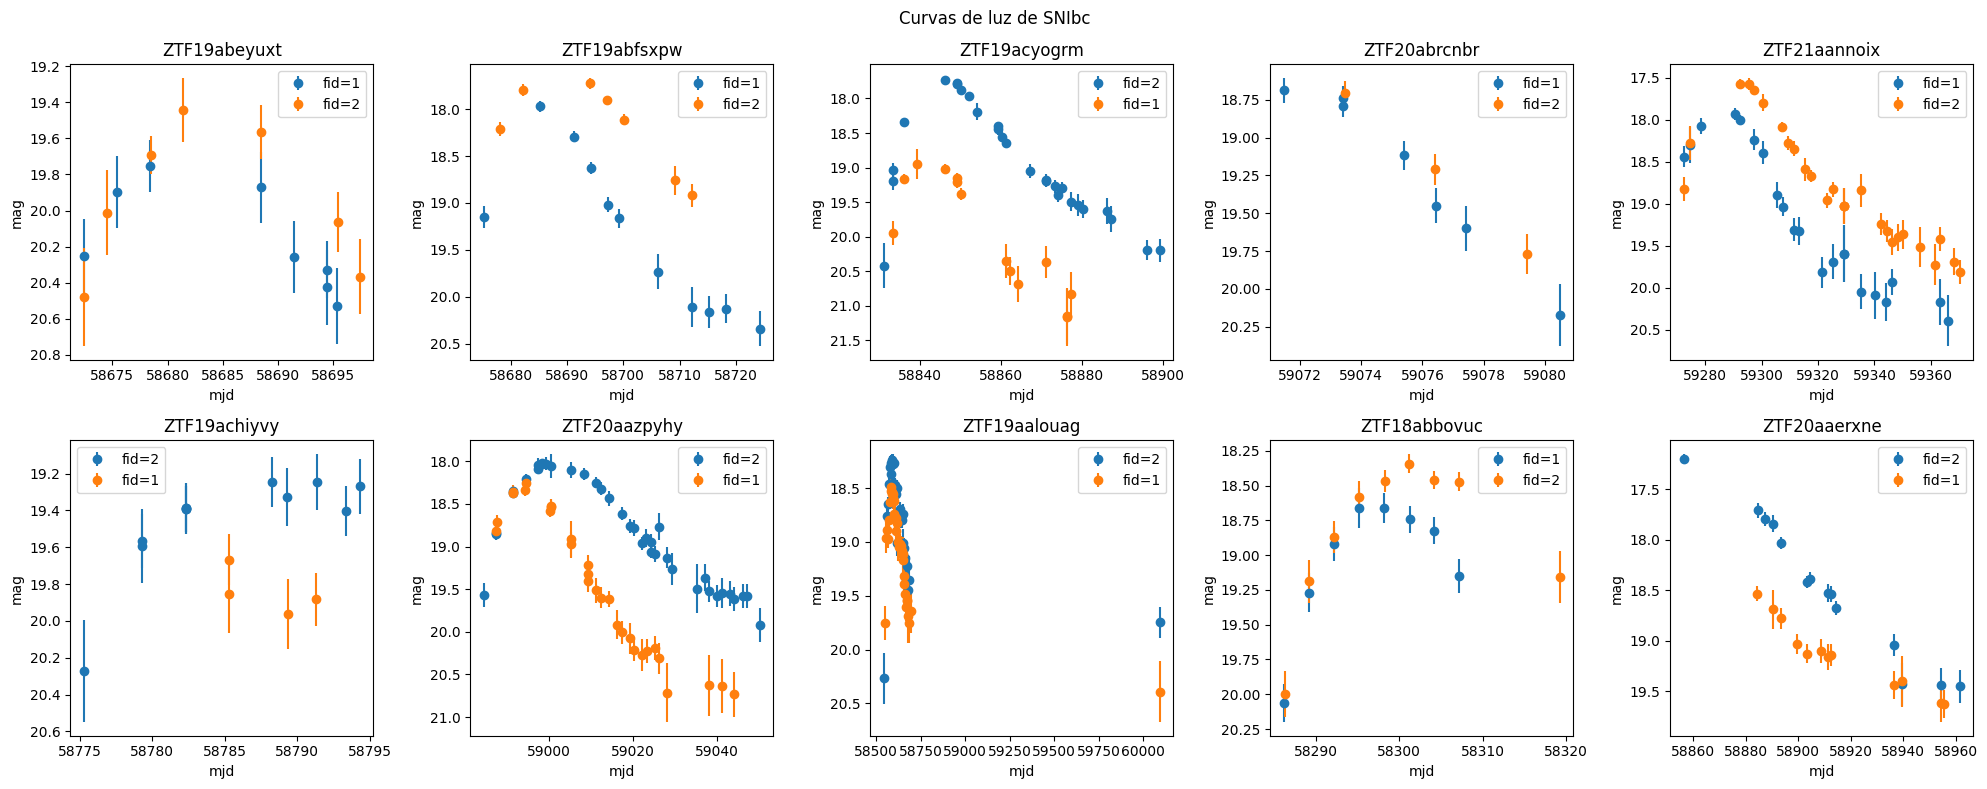

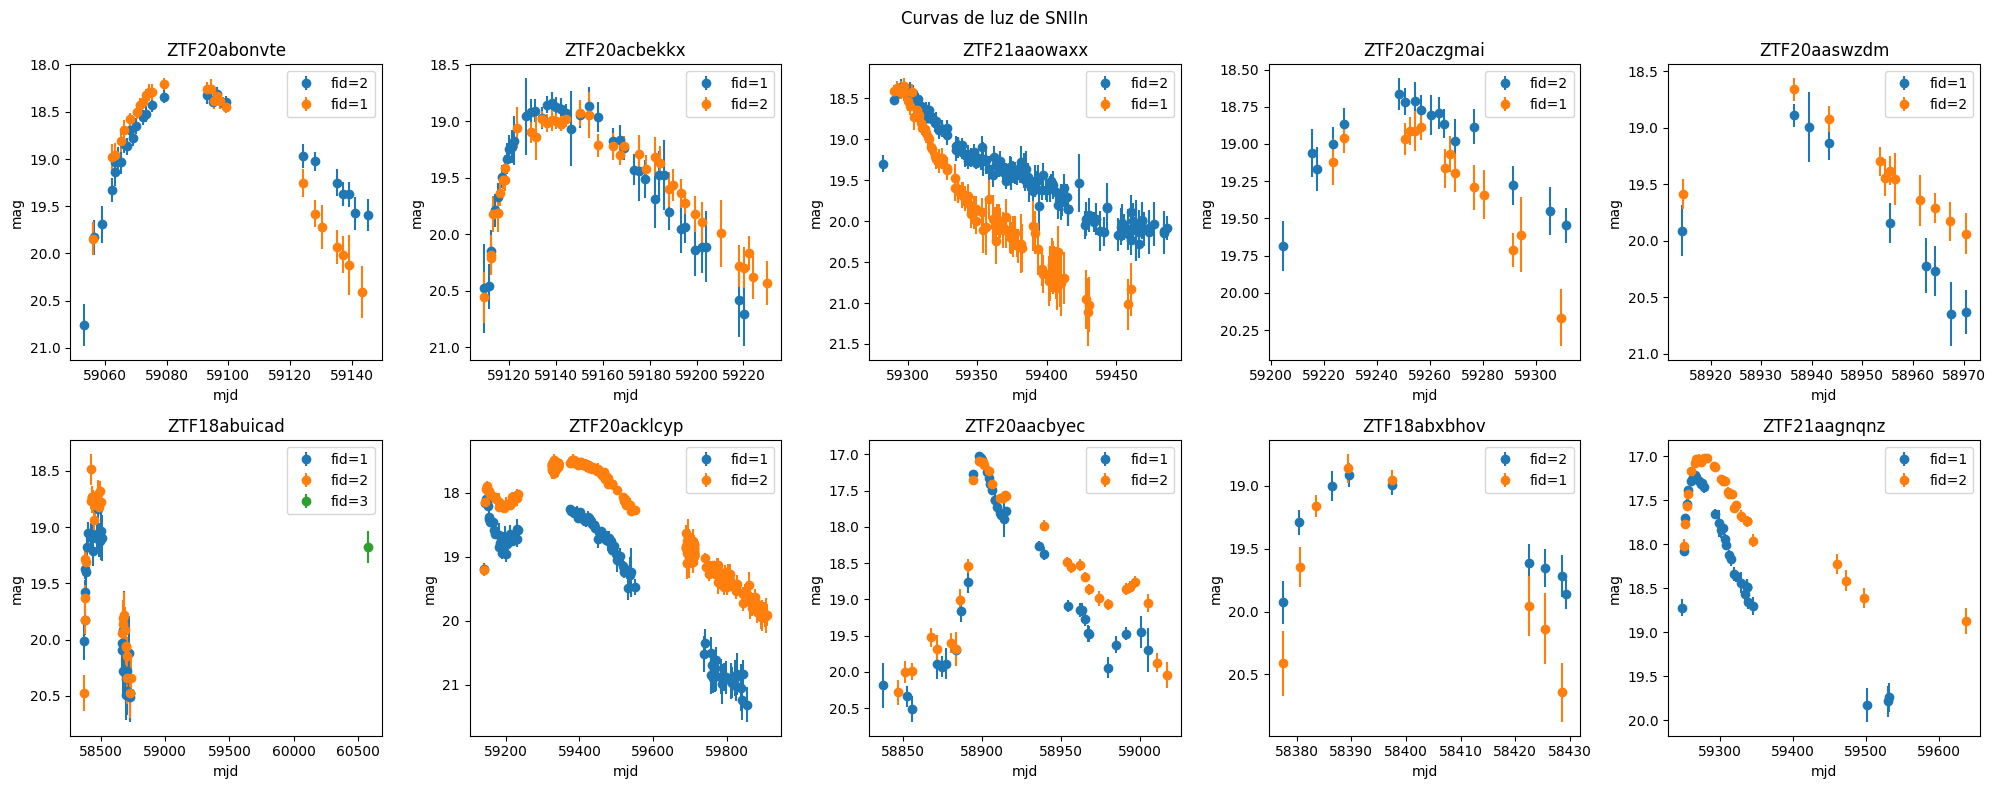

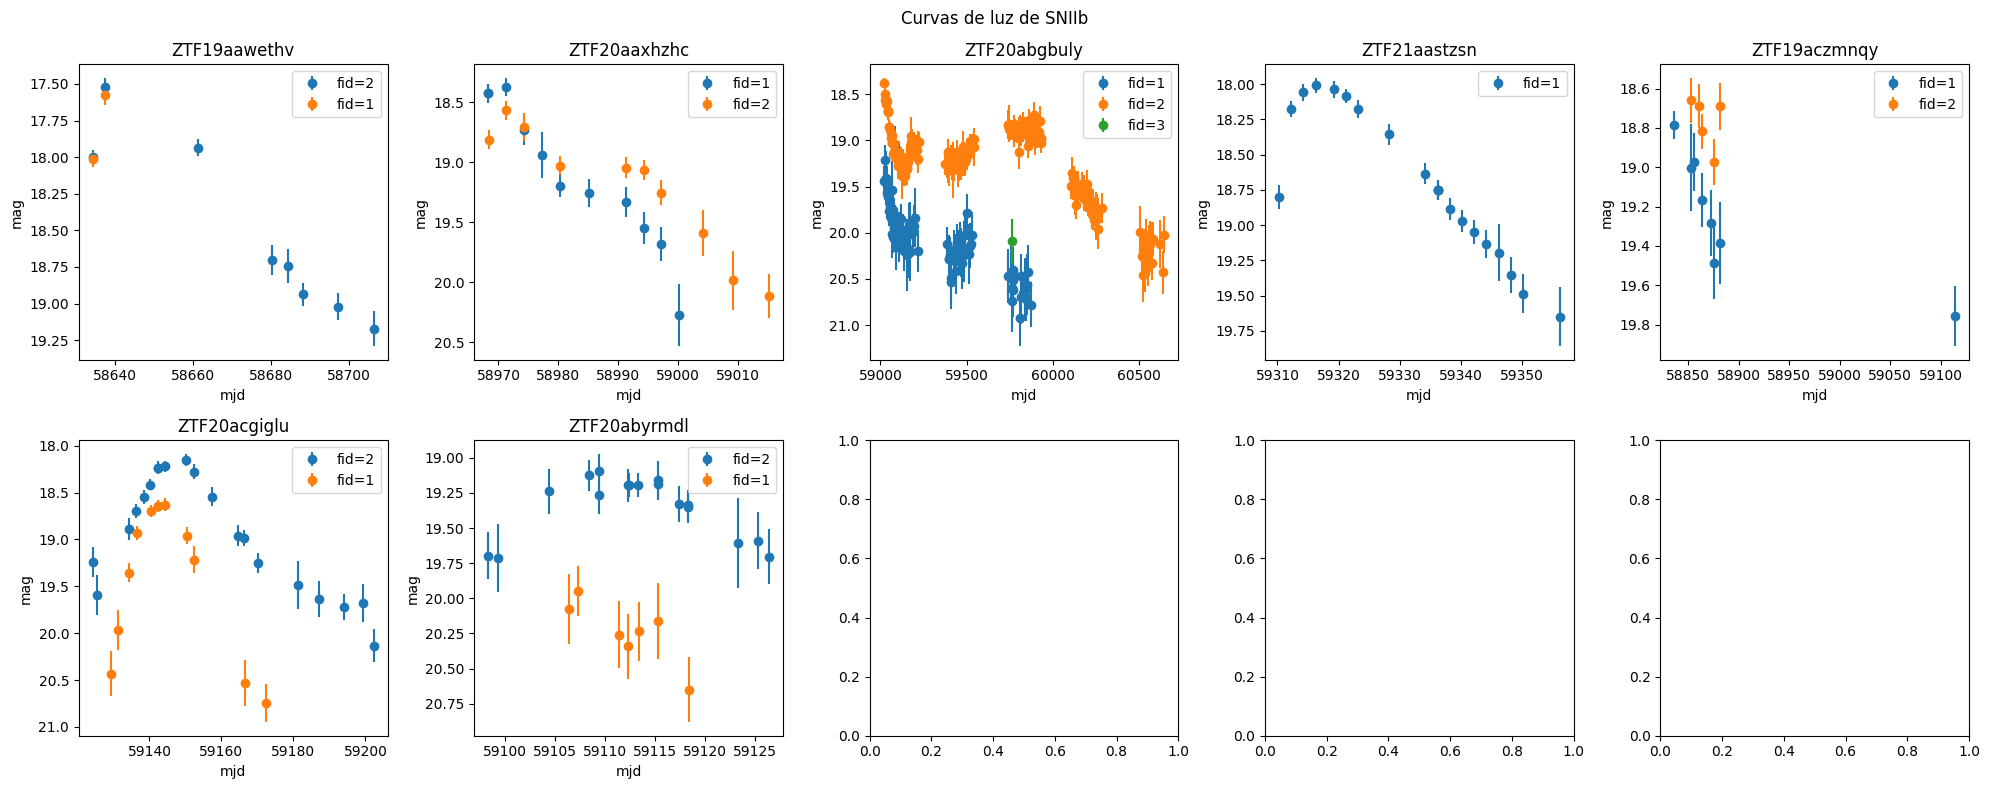

In [11]:
from alerce.core import Alerce  #importamos alerce e iniciamos el cliente
alerce=Alerce()

for cls in y.unique():                      #recorremos las distintas clases
    fig, axes =plt.subplots(2,5,figsize=(20,8))
    fig.suptitle(f'Curvas de luz de {cls}')
    cls_df=df[df['classALeRCE']==cls]       #obtenemos el df de los objetos de cada clase
    ids=cls_df.sample(min(10,len(cls_df)),random_state=42).index   #obtenemos los id de una muestra aleatoria de 10 obj (o los que hayan si hay menos de 10 )
    for id,ax in zip(ids,axes.flatten()):
        lc=alerce.query_lightcurve(id,format='json')            #obtenemos la curva de luz de cada objeto
        det=pd.DataFrame(lc['detections'])                       #hacemos un df con las detecciones
        
        
        for fid in det['fid'].unique():                            #graficamos las curvas
            lc_fid=det[det['fid']==fid]
            ax.errorbar( lc_fid['mjd'],lc_fid['magpsf'],yerr=lc_fid['sigmapsf'],label=f'fid={fid}',fmt='o')
        ax.invert_yaxis()
        ax.set_title(id)
        ax.set_xlabel('mjd')
        ax.set_ylabel('mag')
        ax.legend()
    plt.tight_layout()
    plt.show()

    

In [ ]:
rand_ids=df.sample(30,random_state=562).index    #repetimos lo mismo pero para 30 obj random de todos los datos
for id in rand_ids:
    cls=df.loc[id].classALeRCE
    lc=alerce.query_lightcurve(id,format='json')           
    det=pd.DataFrame(lc['detections'])                       
        
        
    for fid in det['fid'].unique():                            
            lc_fid=det[det['fid']==fid]
            plt.errorbar( lc_fid['mjd'],lc_fid['magpsf'],yerr=lc_fid['sigmapsf'],label=f'fid={fid}',fmt='o')
    plt.gca().invert_yaxis()
    plt.title(f'{id} - clase {cls}')
    plt.xlabel('mjd')
    plt.ylabel('mag')
    plt.legend()
    plt.tight_layout()
    plt.show()

Visualmente se me volvio imposible identificar cual es la clase segun la curva de luz, las caracteristicas que son identificables en los graficos la comparten mas de una clase, por ejemplo RRL, EB e YSO se ven como "persianas". 

In [64]:
from sklearn.model_selection import train_test_split        #separamos los conjuntos de train-test
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_encoded=le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split( X , y_encoded , test_size=0.3,stratify=y,random_state=8742)

In [31]:
#usaremos los metodos: Random Forest, KNN y XGB
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


#definimos los modelos
models={
    "RandomForest":RandomForestClassifier(class_weight='balanced'),
    "KNN":KNeighborsClassifier(),
    "XGB":XGBClassifier(eval_metric="mlogloss")
}
#definimos los hiperparametros a evaluar en el CV
params={
    "RandomForest":{
        "model__n_estimators":[50,100,150],
        "model__max_depth":[None,5,10]},
    "KNN":{
        "model__n_neighbors":[3,5,7,]
    },
    "XGB":{
        "model__n_estimators":[50,100,150],
        "model__max_depth":[6,8,10]
    }
}


#buscamos los mejores hiperparametros
best={}
for name in models:
    pipe=Pipeline([
        ('scaler',StandardScaler()),
        ('model',models[name])
    ])
    grid=GridSearchCV(pipe,params[name],cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=678889),scoring='f1_macro',n_jobs=-1)
    grid.fit(x_train,y_train)
    best[name]=grid  
    print(f"{name} - Mejor score: {grid.best_score_}, Mejor params: {grid.best_params_}")


RandomForest - Mejor score: 0.4408051513465054, Mejor params: {'model__max_depth': 10, 'model__n_estimators': 100}
KNN - Mejor score: 0.32691031841119483, Mejor params: {'model__n_neighbors': 3}
XGB - Mejor score: 0.5135499019510058, Mejor params: {'model__max_depth': 10, 'model__n_estimators': 150}


=================================RandomForest=================================


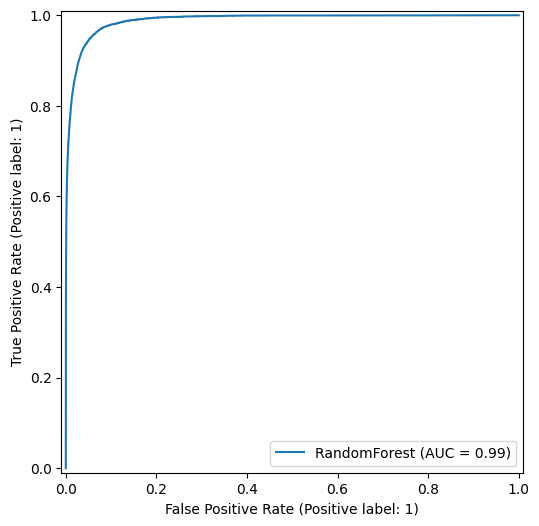

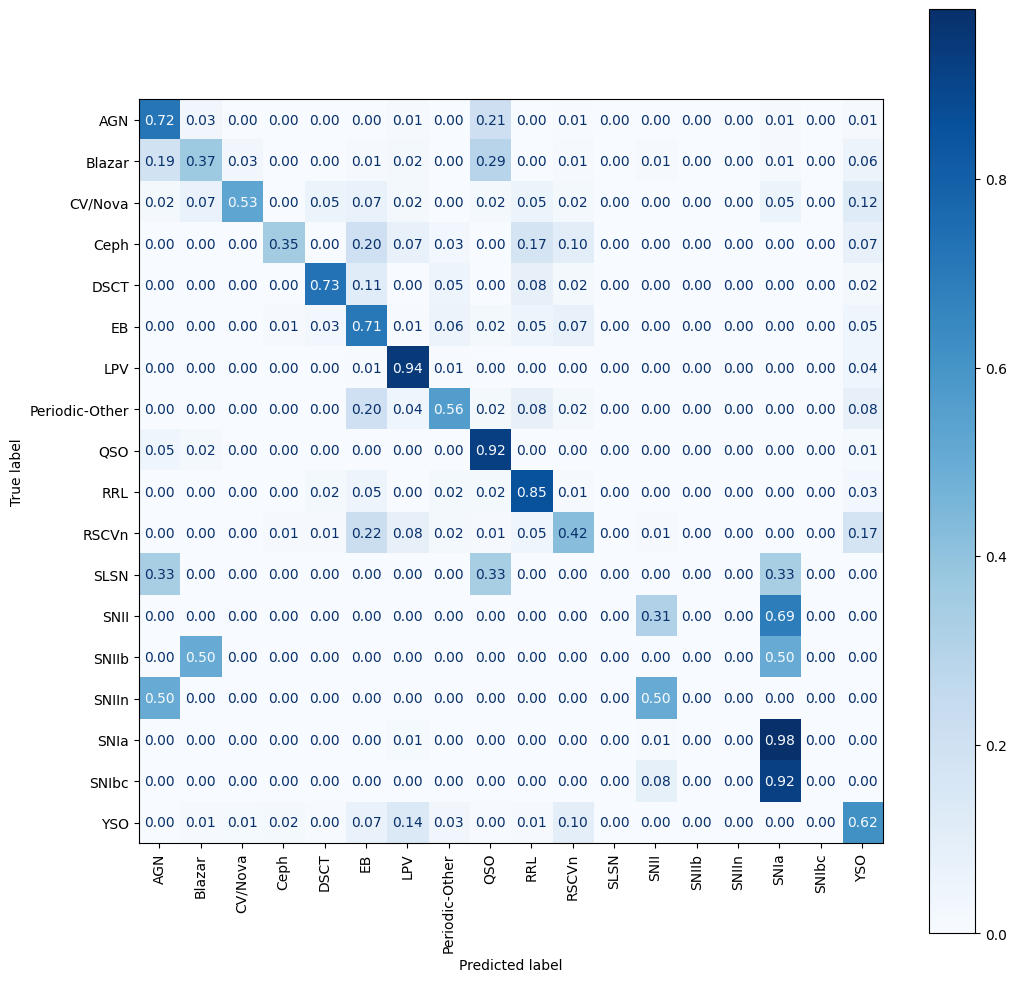

                precision    recall  f1-score   support

           AGN       0.64      0.72      0.68       371
        Blazar       0.31      0.37      0.34        90
       CV/Nova       0.70      0.53      0.60        59
          Ceph       0.21      0.35      0.26        40
          DSCT       0.24      0.73      0.36        63
            EB       0.92      0.71      0.80      3106
           LPV       0.97      0.94      0.95      2599
Periodic-Other       0.11      0.56      0.18        50
           QSO       0.92      0.92      0.92      2505
           RRL       0.92      0.85      0.88      2278
         RSCVn       0.11      0.42      0.18        88
          SLSN       0.00      0.00      0.00         3
          SNII       0.62      0.31      0.42        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.70      0.98      0.82       151
         SNIbc       0.00      0.00      0.00  

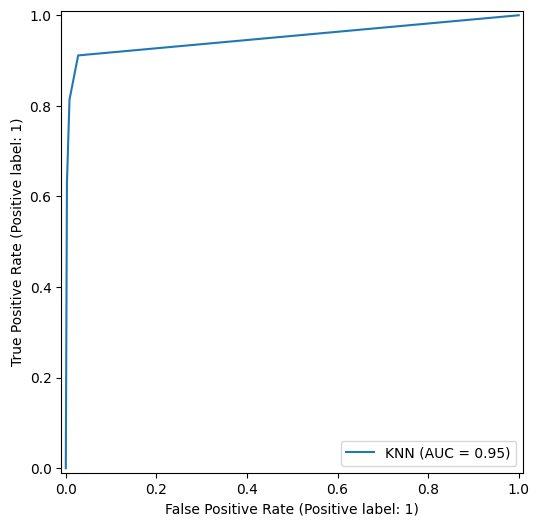

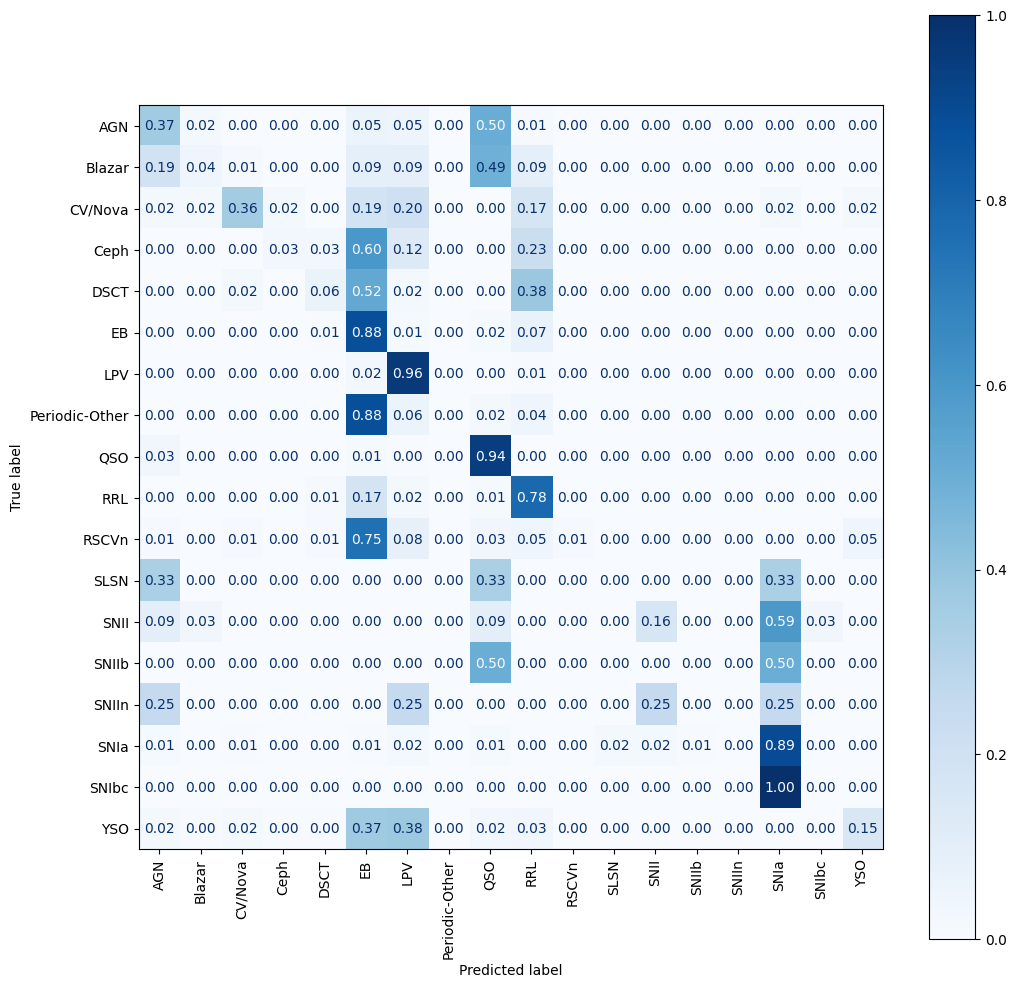

                precision    recall  f1-score   support

           AGN       0.51      0.37      0.43       371
        Blazar       0.15      0.04      0.07        90
       CV/Nova       0.50      0.36      0.42        59
          Ceph       0.04      0.03      0.03        40
          DSCT       0.10      0.06      0.08        63
            EB       0.78      0.88      0.83      3106
           LPV       0.91      0.96      0.94      2599
Periodic-Other       0.00      0.00      0.00        50
           QSO       0.88      0.94      0.91      2505
           RRL       0.85      0.78      0.81      2278
         RSCVn       0.10      0.01      0.02        88
          SLSN       0.00      0.00      0.00         3
          SNII       0.56      0.16      0.24        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.76      0.89      0.82       151
         SNIbc       0.00      0.00      0.00  

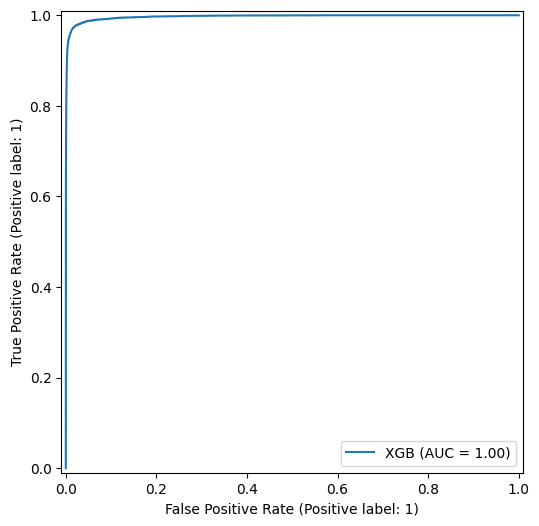

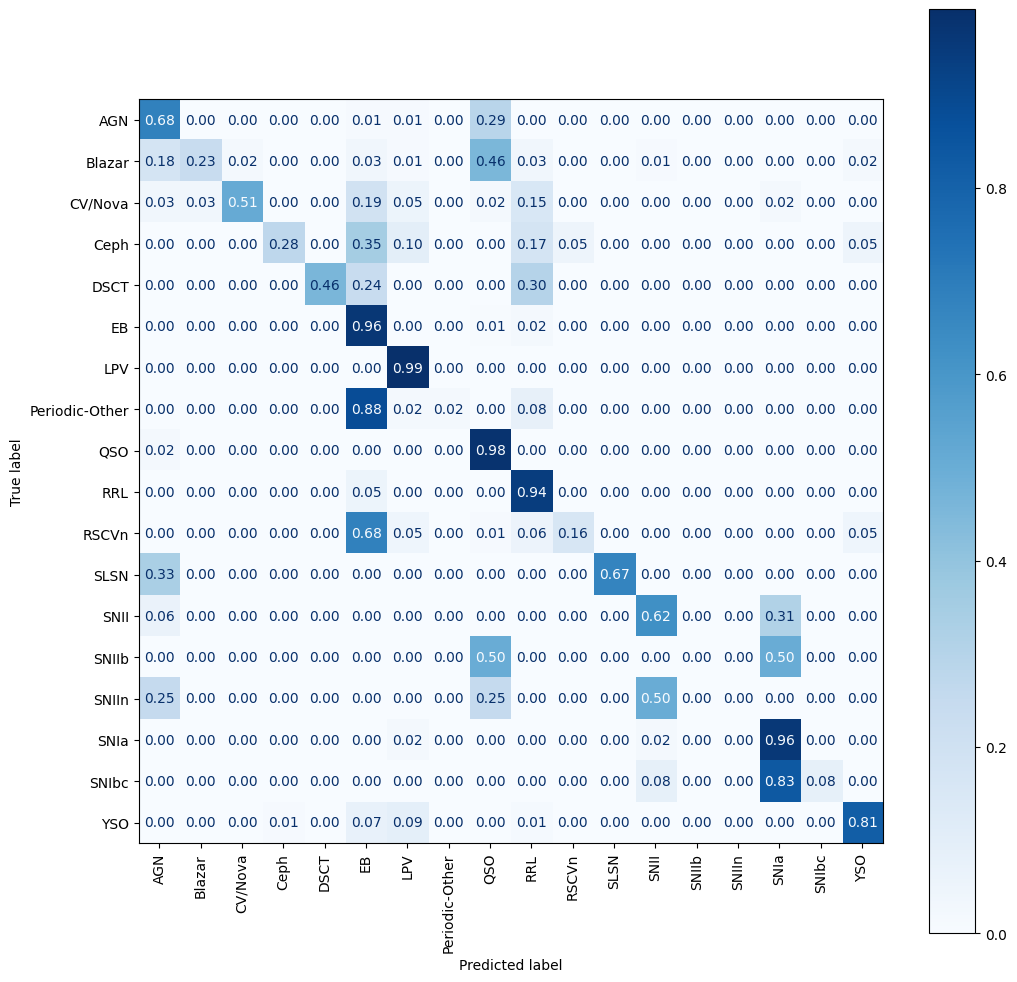

                precision    recall  f1-score   support

           AGN       0.80      0.68      0.73       371
        Blazar       0.72      0.23      0.35        90
       CV/Nova       0.88      0.51      0.65        59
          Ceph       0.73      0.28      0.40        40
          DSCT       0.97      0.46      0.62        63
            EB       0.91      0.96      0.94      3106
           LPV       0.98      0.99      0.99      2599
Periodic-Other       0.33      0.02      0.04        50
           QSO       0.93      0.98      0.95      2505
           RRL       0.94      0.94      0.94      2278
         RSCVn       0.54      0.16      0.25        88
          SLSN       1.00      0.67      0.80         3
          SNII       0.71      0.62      0.67        32
         SNIIb       0.00      0.00      0.00         2
         SNIIn       0.00      0.00      0.00         4
          SNIa       0.87      0.96      0.91       151
         SNIbc       0.50      0.08      0.14  

In [65]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.preprocessing import label_binarize
#para cada metodo mostramos la curva ROC,la matriz de confusion y las metricas macro y micro
y_test=le.inverse_transform(y_test)
y_bin=label_binarize(y_test, classes=np.unique(y_test))

for name, model in best.items():
    print(f'================================={name}=================================')
    y_score=model.predict_proba(x_test)
    y_pred=model.predict(x_test)
    y_pred=le.inverse_transform(y_pred)

    fig, ax = plt.subplots(figsize=(7, 6))
    RocCurveDisplay.from_predictions(y_bin.ravel(),y_score.ravel(),name=name,ax=ax)
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 12))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true',cmap='Blues',values_format='.2f',ax=ax,xticks_rotation='vertical')
    plt.show()
    print(classification_report(y_test,y_pred,zero_division=0))

Observando las metricas a nivel macro y micro notamos que el metodo XGB fue el que mejor desempeño obtuvo, a pesar de eso si analizamos cada clase los 3 metodos fallaron bastante, teniendo clases que no fueron predichas en absoluto por los clasificadores. Esto es precisamente por el desbalance que mencionamos en un principio, y necesita de mas tecnicas para poder solventar este desbalance, como por ejemplo crear datos sinteticos para estas clases.